In [0]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_columns=None


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook',style='ticks',palette='pastel',font='monospace')

pd.set_option('display.float_format', '{:.7f}'.format)

np.set_printoptions(suppress=True, precision=7)

import scipy.stats as stats

# Data Understanding

In [1]:
# loading the csv file
auto_insurance_df = pd.read_csv('Dataset/AutoInsurance.csv')
# display top 5 records
auto_insurance_df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington             2763.5192790       No     Basic  Bachelor   
1  QZ44356     Arizona             6979.5359030       No  Extended  Bachelor   
2  AI49188      Nevada            12887.4316500       No   Premium  Bachelor   
3  WW63253  California             7645.8618270       No     Basic  Bachelor   
4  HB64268  Washington             2813.6925750       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4          3/2/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent         384.8111470   Two-Door Car      Medsize  
1         Agent        1131.4649350  Four-Door Car      Medsize  
2         Agent         566.4722470   Two-Door Car      Medsize  
3   Call Center         529.8813440            SUV      Medsize  
4         Agent         138.1308790  Four-Door Car      Medsize

In [2]:
auto_insurance_df.shape

(9134, 24)

In [3]:
# There are 9134 rows and 24 columns

In [4]:
auto_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# We can see that there is no data or type issue.
# looks like mostly cleaned data but we will check further of check if any value is inconsistence

In [6]:
auto_insurance_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
# looking at the columns we have State, Coverage ,EmploymentStatus, Gender, Income , Location Code, Martial Status, 
# Monthly Premium Auto, Number of Policy, Policy type, Total Claim Amount. These are some column that are present in 
# insurance industry. We will dive deep into each of them in details

In [8]:
auto_insurance_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
# there is no null values present in the dataset which is good.

In [10]:
auto_insurance_df.nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [11]:
# Customer id is having all unique values 
# State having 5 unique values
# Response have 2 unique values yes or no
# Coverage have 3 unique values
# Education have 5 unique values
# Employstatus have 5 unique values
# Gender have 2 values i.e. Male and Female
# Location Code have 3 unique values 
# Matital status 3 unique values which single, 
# Number of Open Complaints have 6 unique values
# Number of Policies have 9 unique values
# Policy Type have 3 unique values
# Policy have 9 unique values
# Renew Offer Type have 4 unique values
# Sales Channel have 4 unique values
# Vehicle Class have 6 unique values
# Vehicle Size have 3 unique values

# Rest of them is numerical columns and can have unique values 

In [12]:
auto_insurance_df.sample(100)

Customer       State  Customer Lifetime Value Response  Coverage  \
5018  FP65563  Washington            15253.2643600       No     Basic   
1867  OM85313  California             2921.9308820       No     Basic   
5720  GU41036      Oregon             9416.2844100       No  Extended   
6980  NP23146     Arizona             5365.9328200       No     Basic   
5939  RM34371      Nevada             4715.2855590       No     Basic   
...       ...         ...                      ...      ...       ...   
4334  ET89070  California             9448.8339310       No     Basic   
4689  HN10814     Arizona             4178.5864940       No     Basic   
6480  GP22382      Oregon             4858.1160420       No  Extended   
1167  ZZ83340      Oregon             5508.3155360       No     Basic   
6501  XY36764  California             2771.0450310      Yes     Basic   

                 Education Effective To Date EmploymentStatus Gender  Income  \
5018  High School or Below           1/24/11         Employed      M   51937   
1867                Master           1/15/11         Employed      M   63499   
5720  High School or Below           2/26/11         Disabled      M   13411   
6980               College           2/22/11         Employed      F   62808   
5939              Bachelor           2/25/11       Unemployed      F       0   
...                    ...               ...              ...    ...     ...   
4334  High School or Below           1/25/11         Employed      F   85221   
4689                Master           1/28/11         Employed      M   62113   
6480               College           1/22/11         Employed      F   21685   
1167                Doctor          4/2/2011         Employed      F   96021   
6501               College         11/1/2011         Employed      F   50071   

     Location Code Marital Status  Monthly Premium Auto  \
5018         Urban        Married                   193   
1867         Urban        Married                    73   
5720      Suburban        Married                   127   
6980         Urban        Married                    66   
5939      Suburban        Married                    64   
...            ...            ...                   ...   
4334         Urban        Married                   117   
4689         Rural        Married                   104   
6480      Suburban         Single                   127   
1167         Urban        Married                    68   
6501         Rural         Single                    71   

      Months Since Last Claim  Months Since Policy Inception  \
5018                        5                             40   
1867                       21                             79   
5720                       27                             81   
6980                       33                             37   
5939                       28                             43   
...                       ...                            ...   
4334                       11                             42   
4689                        1                              0   
6480                        0                             70   
1167                        5                             30   
6501                        3                             32   

      Number of Open Complaints  Number of Policies     Policy Type  \
5018                          0                   9   Personal Auto   
1867                          0                   1   Personal Auto   
5720                          0                   7   Personal Auto   
6980                          0                   4    Special Auto   
5939                          0                   7   Personal Auto   
...                         ...                 ...             ...   
4334                          0                   4   Personal Auto   
4689                          0                   1   Personal Auto   
6480                          0                   

In [13]:
auto_insurance_df.memory_usage()

Index                              132
Customer                         73072
State                            73072
Customer Lifetime Value          73072
Response                         73072
Coverage                         73072
Education                        73072
Effective To Date                73072
EmploymentStatus                 73072
Gender                           73072
Income                           73072
Location Code                    73072
Marital Status                   73072
Monthly Premium Auto             73072
Months Since Last Claim          73072
Months Since Policy Inception    73072
Number of Open Complaints        73072
Number of Policies               73072
Policy Type                      73072
Policy                           73072
Renew Offer Type                 73072
Sales Channel                    73072
Total Claim Amount               73072
Vehicle Class                    73072
Vehicle Size                     73072
dtype: int64

In [14]:
auto_insurance_df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count             9134.0000000  9134.0000000          9134.0000000   
mean              8004.9404750 37657.3800088            93.2192906   
std               6870.9676084 30379.9047338            34.4079674   
min               1898.0076750     0.0000000            61.0000000   
25%               3994.2517942     0.0000000            68.0000000   
50%               5780.1821970 33889.5000000            83.0000000   
75%               8962.1670413 62320.0000000           109.0000000   
max              83325.3811900 99981.0000000           298.0000000   

       Months Since Last Claim  Months Since Policy Inception  \
count             9134.0000000                   9134.0000000   
mean                15.0970002                     48.0645938   
std                 10.0732566                     27.9059908   
min                  0.0000000                      0.0000000   
25%                  6.0000000                     24.0000000   
50%                 14.0000000                     48.0000000   
75%                 23.0000000                     71.0000000   
max                 35.0000000                     99.0000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count               9134.0000000        9134.0000000        9134.0000000  
mean                   0.3843880           2.9661704         434.0887943  
std                    0.9103835           2.3901818         290.5000918  
min                    0.0000000           1.0000000           0.0990070  
25%                    0.0000000           1.0000000         272.2582445  
50%                    0.0000000           2.0000000         383.9454335  
75%                    0.0000000           4.0000000         547.5148387  
max                    5.0000000           9.0000000        2893.2396780

In [15]:
# CLV mean > median so it looks like right skewed 
# Income mean > median  so it is also right skewed
# Monthly Premium Auto is also right skewed
# Months Since Last Claim is also right skewed
# Months Since Policy Inception mean and median almost close mean it almost normally distributed
# Number of Open Complaints is also right skewed
# Number of Policies is also right skewed
# Total Claim Amount is also right skewed

# Except Months Since Policy Inception all the other columns are right skewed so there could be potential extreme values
# on upper side of range.

In [16]:
auto_insurance_df.describe(include='O')

Customer       State Response Coverage Education Effective To Date  \
count      9134        9134     9134     9134      9134              9134   
unique     9134           5        2        3         5                59   
top     BU79786  California       No    Basic  Bachelor         10/1/2011   
freq          1        3150     7826     5568      2748               195   

       EmploymentStatus Gender Location Code Marital Status    Policy Type  \
count              9134   9134          9134           9134           9134   
unique                5      2             3              3              3   
top            Employed      F      Suburban        Married  Personal Auto   
freq               5698   4658          5779           5298           6788   

             Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
count          9134             9134          9134           9134         9134  
unique            9                4             4              6            3  
top     Personal L3           Offer1         Agent  Four-Door Car      Medsize  
freq           3426             3752          3477           4621         6424

In [17]:
auto_insurance_df_copy = auto_insurance_df.copy()
auto_insurance_df_copy.drop('Customer', axis=1, inplace=True)
# dropping Customer column as it is not important for our analysis

In [18]:
for col in auto_insurance_df_copy.select_dtypes('O'):
    print(col,auto_insurance_df_copy[col].unique())
    print('*'*100)

State ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
****************************************************************************************************
Response ['No' 'Yes']
****************************************************************************************************
Coverage ['Basic' 'Extended' 'Premium']
****************************************************************************************************
Education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
****************************************************************************************************
Effective To Date ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '3/2/2011' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '6/1/2011' '6/2/2011' '10/1/2011' '1/17/11'
 '5/1/2011' '2/27/11' '1/14/11' '1/21/11' '5/2/2011' '1/29/11' '2/28/11'
 '12/2/2011' '2/2/2011' '7/2/2011' '1/22/11' '2/13/11' '1/15/11'
 '8/1/2011' '11/1/2011' '1/28/11' '8/2/2011' '2/23/11' '2/1/2011'
 '2/16/11' '1/27/11' '1/23/11

In [19]:
# We have 'Washington' 'Arizona' 'Nevada' 'California' and'Oregon' in state column.
# Response is having YES and NO values which was expected.
# Coverage is having 'Basic' 'Extended' and 'Premium' values.
# Education is having 'Bachelor' 'College' 'Master' and 'High School or Below' 'Doctor' values.
# Employees status is 'Employed' 'Unemployed' 'Medical Leave' 'Disabled' and 'Retired'.
# Effective To Date is having date from year 2011 but format is inconsistent so need to change that.
# Gender have 2 unique values 'F' and 'M'.
# location code have 3 unique values 'Suburban' 'Rural' and 'Urban'.
# Martial status have 3 unique values 'Married' 'Single' and 'Divorced'
# Policy type have Corporate Auto' 'Personal Auto' and 'Special Auto'
# Policy have 'Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2' 'Corporate L1' 'Personal L2' 'Special L1' 
# and 'Special L3'.
# Renew Offer Type have 4 unique values i.e 'Offer1' 'Offer3' 'Offer2' and 'Offer4'.
# Sales Channel have 4 unique values 'Agent' 'Call Center' 'Web' and  'Branch'
# Vehicle class have 6 unique 'Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car' and 'Luxury Car'
# Vehicle having 3 unique values 'Medsize' 'Small' and 'Large'

In [20]:
auto_insurance_df_copy.select_dtypes(exclude='O').skew()

Customer Lifetime Value         3.0322803
Income                          0.2868873
Monthly Premium Auto            2.1235464
Months Since Last Claim         0.2785863
Months Since Policy Inception   0.0401650
Number of Open Complaints       2.7832631
Number of Policies              1.2533327
Total Claim Amount              1.7149658
dtype: float64

In [21]:
# Customer Lifetime Value,Monthly Premium Auto,Number of Open Complaints and Total Claim Amount is right skewed and rest of
# columns is slightly less right skewed,

In [22]:
auto_insurance_df_copy.select_dtypes(exclude='O').kurt()

Customer Lifetime Value         13.8235334
Income                          -1.0943260
Monthly Premium Auto             6.1936050
Months Since Last Claim         -1.0736677
Months Since Policy Inception   -1.1330459
Number of Open Complaints        7.7493085
Number of Policies               0.3631566
Total Claim Amount               5.9794010
dtype: float64

In [23]:
# Peakness of Customer Lifetime Value is much higher than other columnn

# Data Cleaning

In [24]:
# Need the Customer Lifetime Value column name -> CLV

auto_insurance_df_copy.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [25]:
# Need to change the format of Effective To Date
auto_insurance_df_copy['Effective To Date'] = pd.to_datetime(auto_insurance_df_copy['Effective To Date'])
auto_insurance_df_copy['Effective Month'] = auto_insurance_df_copy['Effective To Date'].apply(lambda x:x.month)
auto_insurance_df_copy.drop('Effective To Date', axis=1, inplace=True)
auto_insurance_df_copy.head()

State           CLV Response  Coverage Education EmploymentStatus  \
0  Washington  2763.5192790       No     Basic  Bachelor         Employed   
1     Arizona  6979.5359030       No  Extended  Bachelor       Unemployed   
2      Nevada 12887.4316500       No   Premium  Bachelor         Employed   
3  California  7645.8618270       No     Basic  Bachelor       Unemployed   
4  Washington  2813.6925750       No     Basic  Bachelor         Employed   

  Gender  Income Location Code Marital Status  Monthly Premium Auto  \
0      F   56274      Suburban        Married                    69   
1      F       0      Suburban         Single                    94   
2      F   48767      Suburban        Married                   108   
3      M       0      Suburban        Married                   106   
4      M   43836         Rural         Single                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies     Policy Type  \
0                          0                   1  Corporate Auto   
1                          0                   8   Personal Auto   
2                          0                   2   Personal Auto   
3                          0                   7  Corporate Auto   
4                          0                   1   Personal Auto   

         Policy Renew Offer Type Sales Channel  Total Claim Amount  \
0  Corporate L3           Offer1         Agent         384.8111470   
1   Personal L3           Offer3         Agent        1131.4649350   
2   Personal L3           Offer1         Agent         566.4722470   
3  Corporate L2           Offer1   Call Center         529.8813440   
4   Personal L1           Offer1         Agent         138.1308790   

   Vehicle Class Vehicle Size  Effective Month  
0   Two-Door Car      Medsize                2  
1  Four-Door Car      Medsize                1  
2   Two-Door Car      Medsize                2  
3            SUV      Medsize                1  
4  Four-Door Car      Medsize                3

In [26]:
# Now we will do Data Visualization

# Data Visualization

##### Numerical columns

In [27]:
auto_insurance_df_copy_num = auto_insurance_df_copy.select_dtypes(exclude='O')
auto_insurance_df_copy_num.head()

CLV  Income  Monthly Premium Auto  Months Since Last Claim  \
0  2763.5192790   56274                    69                       32   
1  6979.5359030       0                    94                       13   
2 12887.4316500   48767                   108                       18   
3  7645.8618270       0                   106                       18   
4  2813.6925750   43836                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Total Claim Amount  Effective Month  
0                   1         384.8111470                2  
1                   8        1131.4649350                1  
2                   2         566.4722470                2  
3                   7         529.8813440                1  
4                   1         138.1308790                3

In [28]:
auto_insurance_df_copy_num.skew()

CLV                             3.0322803
Income                          0.2868873
Monthly Premium Auto            2.1235464
Months Since Last Claim         0.2785863
Months Since Policy Inception   0.0401650
Number of Open Complaints       2.7832631
Number of Policies              1.2533327
Total Claim Amount              1.7149658
Effective Month                 1.3226534
dtype: float64

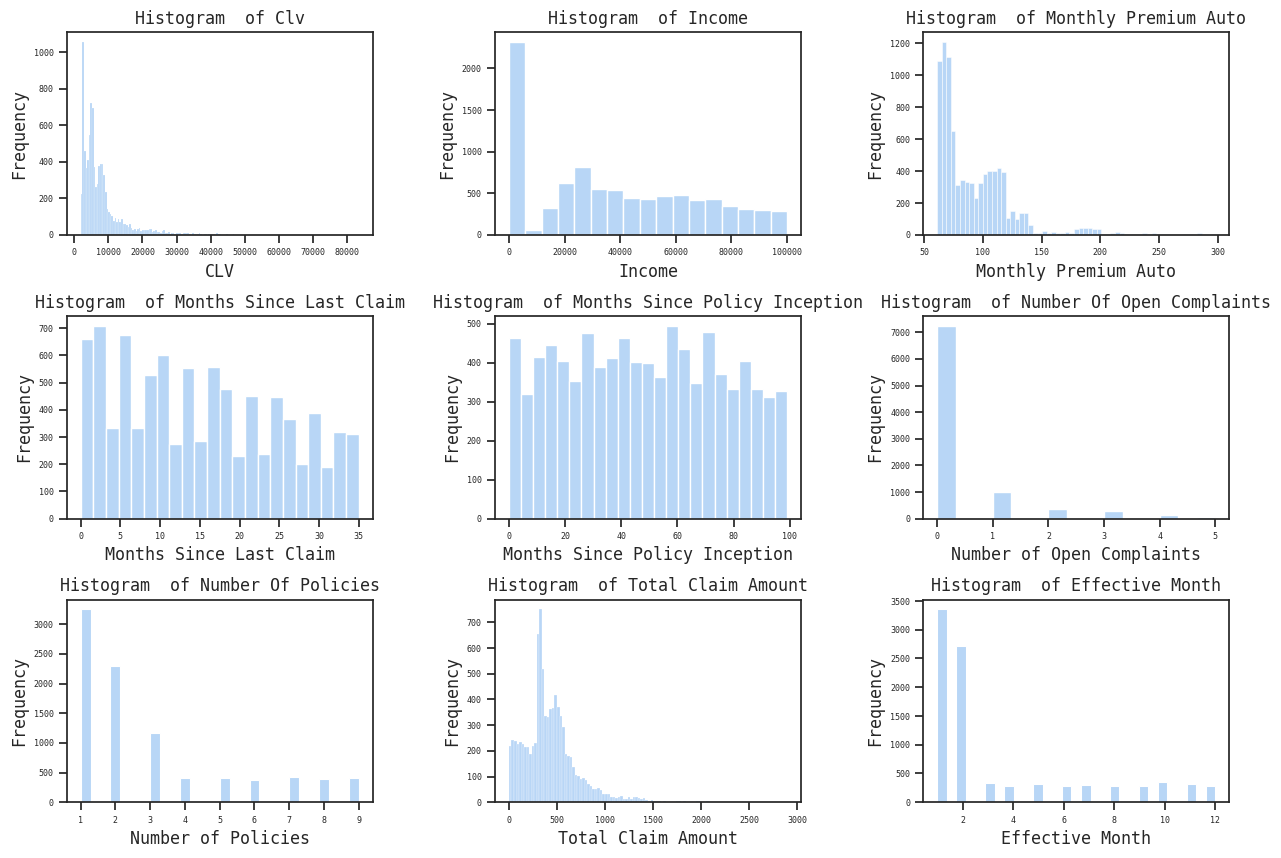

In [29]:
# Create a figure and axes
fig, axes = plt.subplots(3,3, figsize=(15, 10), sharey=False)

# Loop through each column and plot a histogram
for i,(col,ax) in enumerate(zip(auto_insurance_df_copy_num.columns,axes.flatten())):
                                                                   # Flatten the axes array for easy iteration
        
    sns.histplot(auto_insurance_df_copy_num[col], kde=False, ax=ax) # Pass ax to sns.histplot
    ax.set_title(f"Histogram  of {col.title()}", fontsize=12) # Set title
    ax.set_xlabel(col, fontsize=12)  # Set x-axis label
    ax.set_ylabel('Frequency', fontsize=12)  # Set y-axis label
    
    ax.tick_params(axis='both', which ='major', labelsize=6)
    
# Turn off unused subplots if fewer than 9 columns
for j in range(len(auto_insurance_df_copy_num.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap with more space between plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Increase horizontal and vertical space

# Show the plot
plt.show()

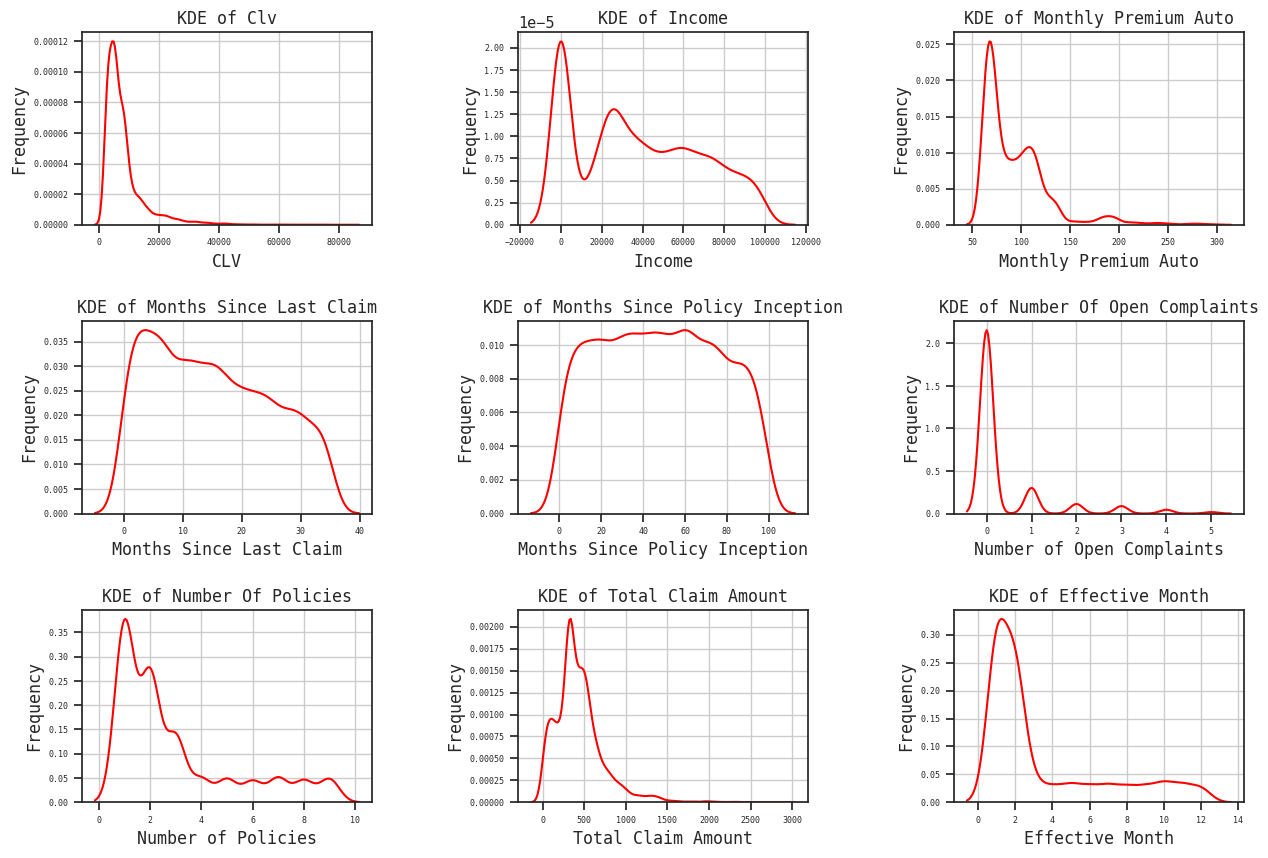

In [30]:
# Create a figure and axes
fig, axes = plt.subplots(3,3, figsize=(15, 10), sharey=False)

# Loop through each column and plot a histogram
for i,(col,ax) in enumerate(zip(auto_insurance_df_copy_num.columns,axes.flatten())):
                                                                   # Flatten the axes array for easy iteration
        
    sns.kdeplot(auto_insurance_df_copy_num[col], ax=ax, color='red') # Pass ax to sns.histplot
    ax.set_title(f"KDE of {col.title()}", fontsize=12) # Set title
    ax.set_xlabel(col, fontsize=12)  # Set x-axis label
    ax.set_ylabel('Frequency', fontsize=12)  # Set y-axis label
    ax.grid()
    ax.tick_params(axis='both', which ='major', labelsize=6)
    
# Turn off unused subplots if fewer than 9 columns
for j in range(len(auto_insurance_df_copy_num.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap with more space between plots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Increase horizontal and vertical space

# Show the plot
plt.show()

In [31]:
# Most of the column are right skewed execpt

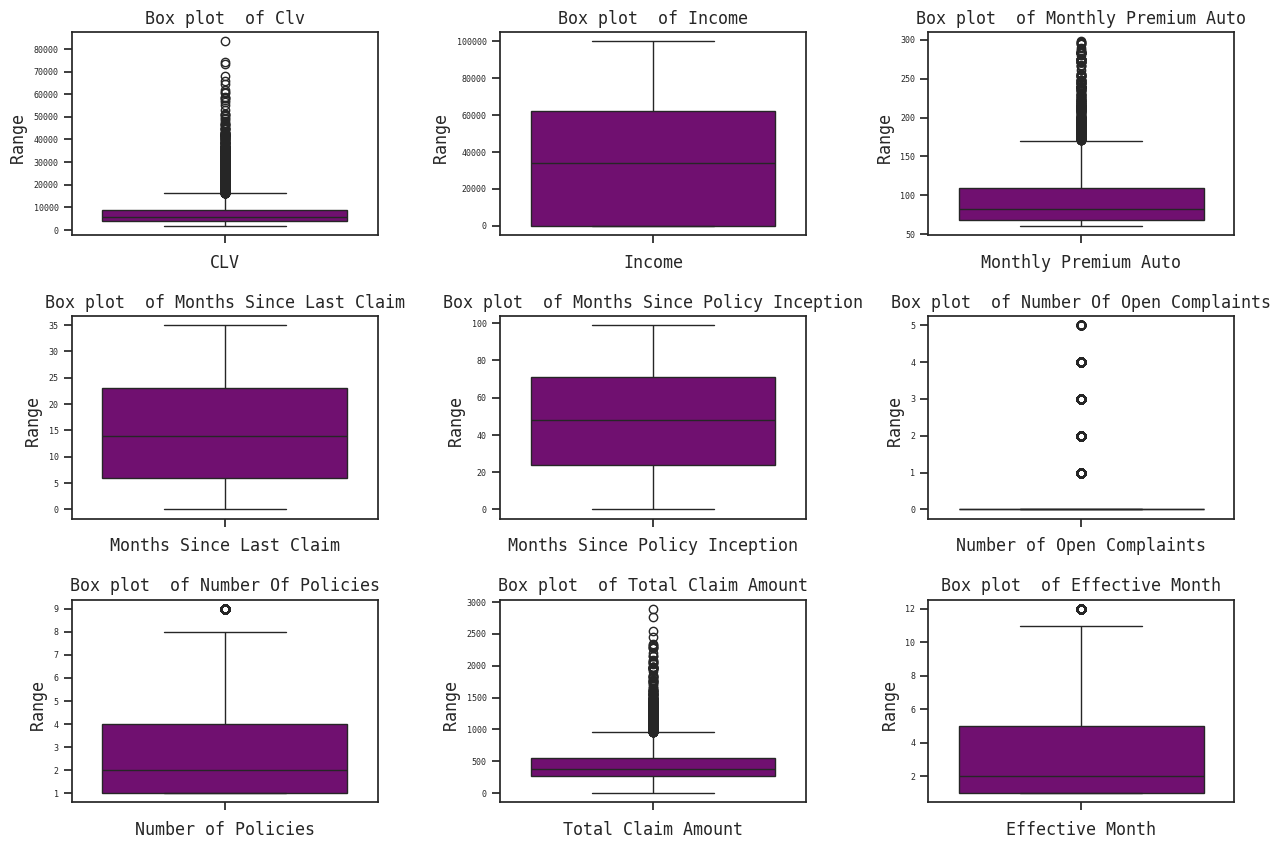

In [32]:
# Create a figure and axes
fig, axes = plt.subplots(3,3, figsize=(15, 10), sharey=False)

# Loop through each column and plot a histogram
for i,(col,ax) in enumerate(zip(auto_insurance_df_copy_num.columns,axes.flatten())):
                                                                   # Flatten the axes array for easy iteration
        
    sns.boxplot(auto_insurance_df_copy_num[col], ax=ax,color='purple') # Pass ax to sns.histplot
    ax.set_title(f"Box plot  of {col.title()}", fontsize=12) # Set title
    ax.set_xlabel(col, fontsize=12)  # Set x-axis label
    ax.set_ylabel('Range ', fontsize=12)  # Set y-axis label
    
    ax.tick_params(axis='both', which ='major', labelsize=6)
    
# Turn off unused subplots if fewer than 9 columns
for j in range(len(auto_insurance_df_copy_num.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap with more space between plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Increase horizontal and vertical space

# Show the plot
plt.show()

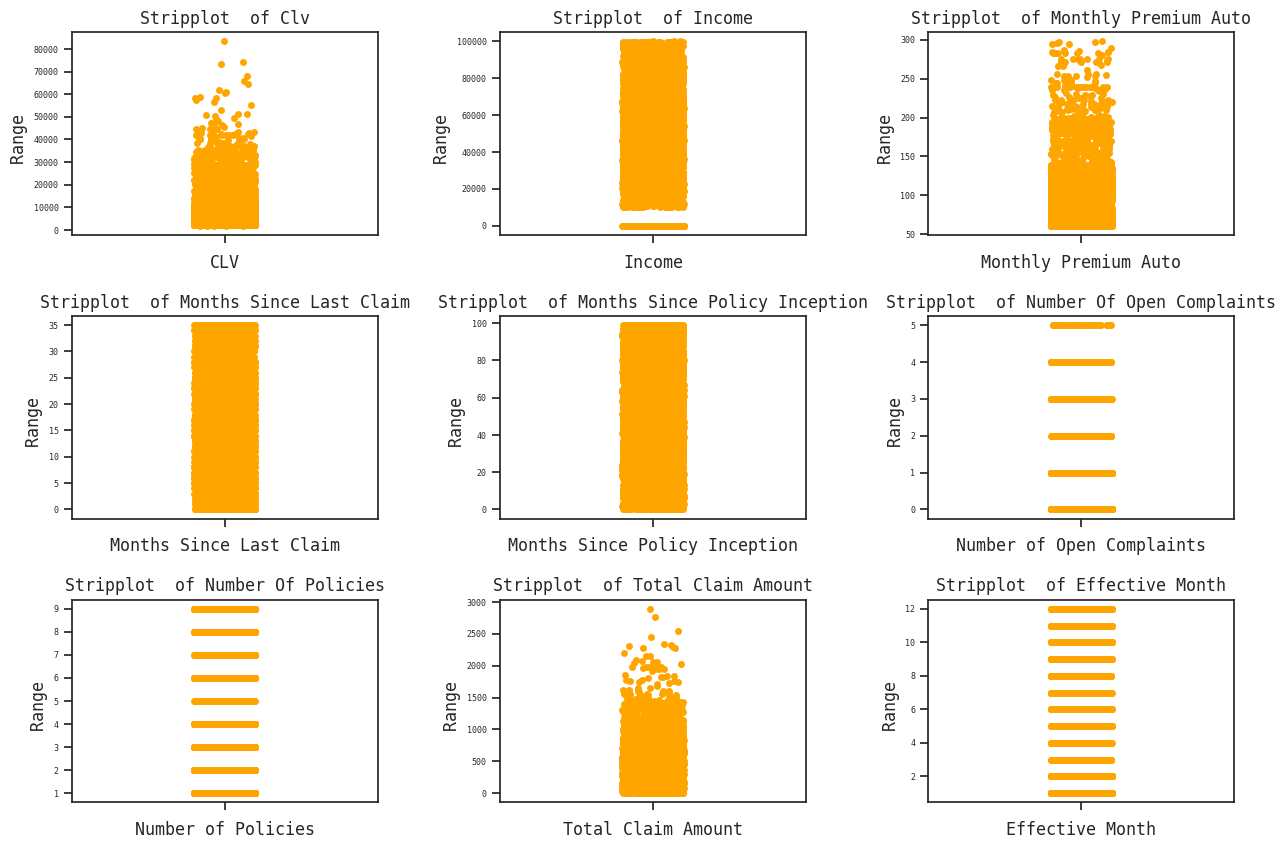

In [33]:
# Create a figure and axes
fig, axes = plt.subplots(3,3, figsize=(15, 10), sharey=False)

# Loop through each column and plot a histogram
for i,(col,ax) in enumerate(zip(auto_insurance_df_copy_num.columns,axes.flatten())):
                                                                   # Flatten the axes array for easy iteration
        
    sns.stripplot(auto_insurance_df_copy_num[col], ax=ax ,color='orange') # Pass ax to sns.histplot
    ax.set_title(f"Stripplot  of {col.title()}", fontsize=12) # Set title
    ax.set_xlabel(col, fontsize=12)  # Set x-axis label
    ax.set_ylabel('Range ', fontsize=12)  # Set y-axis label
    
    ax.tick_params(axis='both', which ='major', labelsize=6)
    
# Turn off unused subplots if fewer than 9 columns
for j in range(len(auto_insurance_df_copy_num.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap with more space between plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Increase horizontal and vertical space

# Show the plot
plt.show()

##### Going to analyze each column separately 

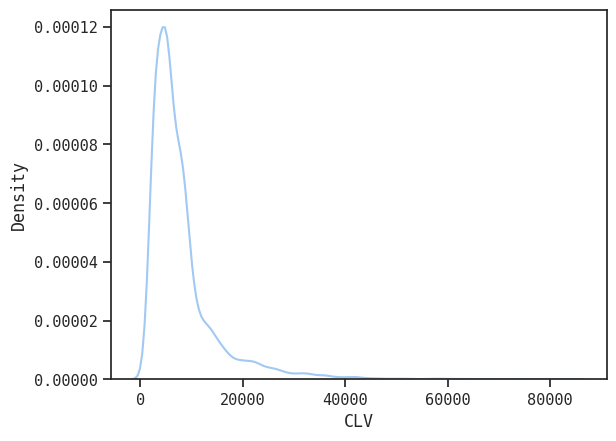

In [34]:
sns.kdeplot(auto_insurance_df_copy_num['CLV'])
plt.show()

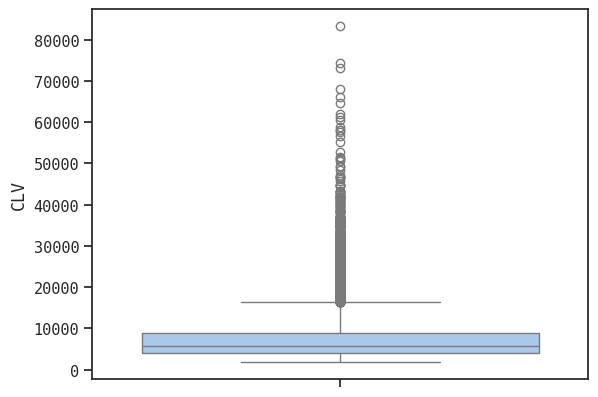

In [35]:
sns.boxplot(auto_insurance_df_copy_num['CLV'])
plt.show()

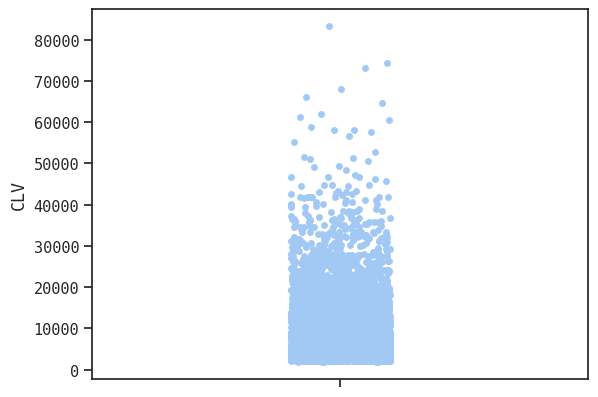

In [36]:
sns.stripplot(auto_insurance_df_copy_num['CLV'])
plt.show()

In [37]:
np.percentile(auto_insurance_df_copy_num['CLV'],99.5)

41787.90343

In [38]:
# There is lot of outliers in CLV column but we cannot treat them directly.

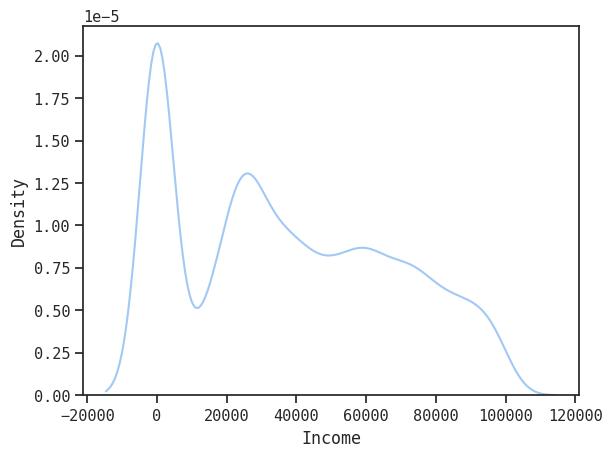

In [39]:
sns.kdeplot(auto_insurance_df_copy_num['Income'])
plt.show()

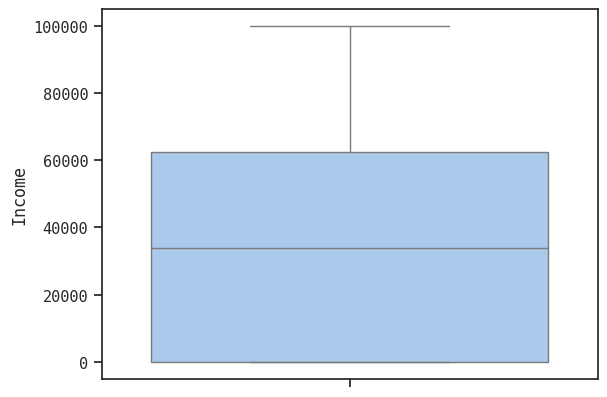

In [40]:
sns.boxplot(auto_insurance_df_copy_num['Income'])
plt.show()

In [41]:
auto_insurance_df_copy_num[auto_insurance_df_copy_num['Income']==0].shape

(2317, 9)

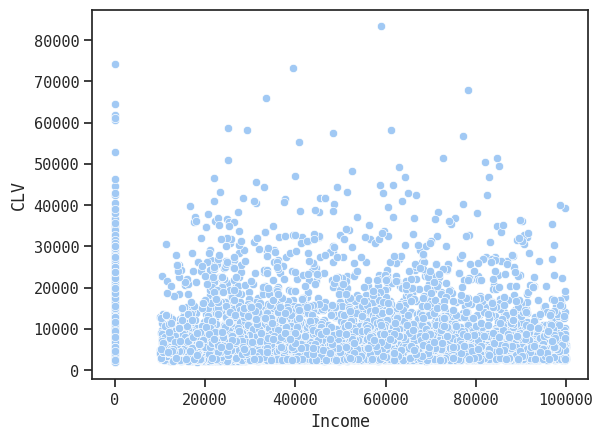

In [42]:
sns.scatterplot(x=auto_insurance_df_copy_num['Income'], y=auto_insurance_df_copy_num['CLV'])
plt.show()

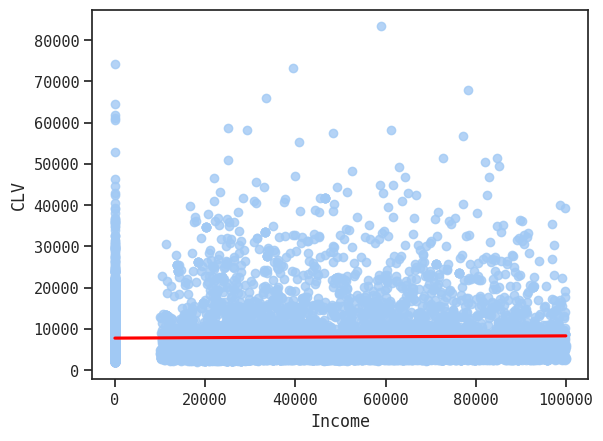

In [43]:
sns.regplot(x=auto_insurance_df_copy_num['Income'], y=auto_insurance_df_copy_num['CLV'],line_kws={"color": "red"})
plt.show()

In [44]:
# There no relationship between Income and CLV.

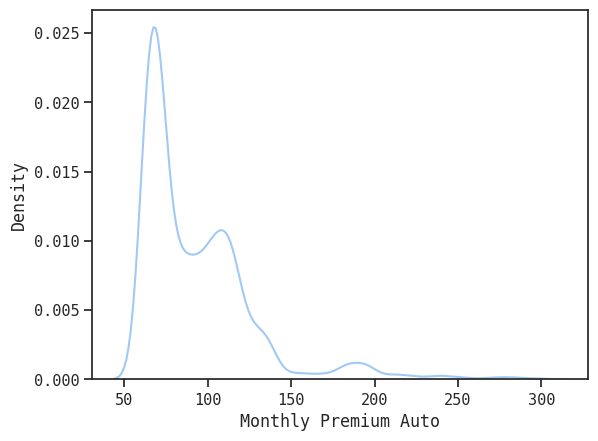

In [45]:
sns.kdeplot(auto_insurance_df_copy_num['Monthly Premium Auto'])
plt.show()

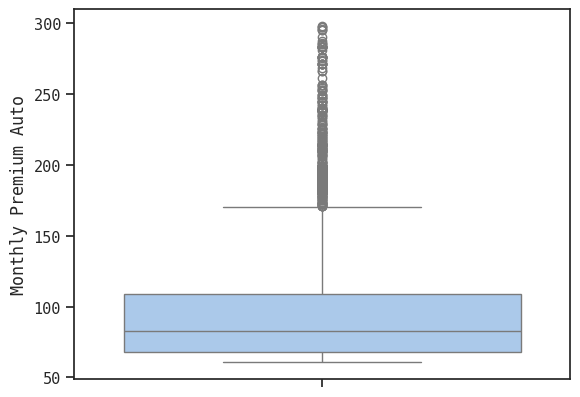

In [46]:
sns.boxplot(auto_insurance_df_copy_num['Monthly Premium Auto'])
plt.show()

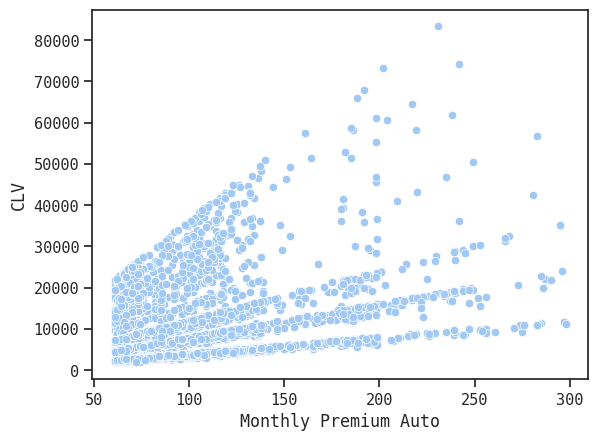

In [47]:
sns.scatterplot(x=auto_insurance_df_copy_num['Monthly Premium Auto'], y=auto_insurance_df_copy_num['CLV'])
plt.show()

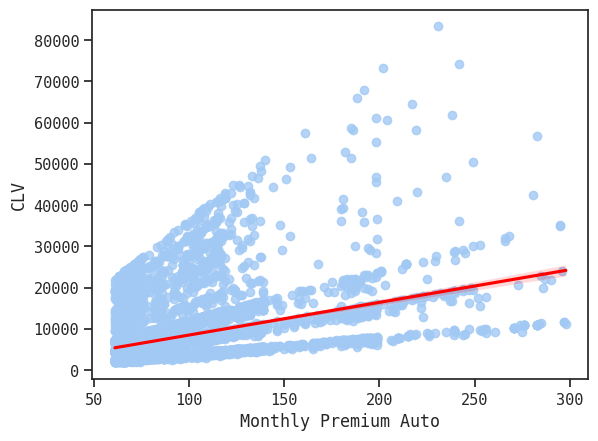

In [48]:
sns.regplot(x=auto_insurance_df_copy_num['Monthly Premium Auto'], y=auto_insurance_df_copy_num['CLV'],
            line_kws={'color':'red'})
plt.show()

In [49]:
# There is slightly linear relationship between Monthly Premium Auto and CLV.

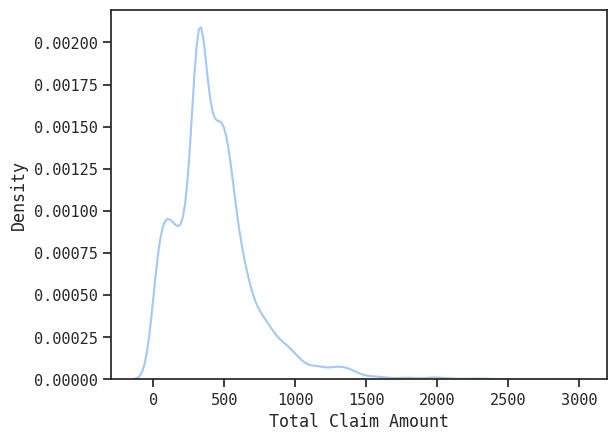

In [50]:
sns.kdeplot(auto_insurance_df_copy_num['Total Claim Amount'])
plt.show()

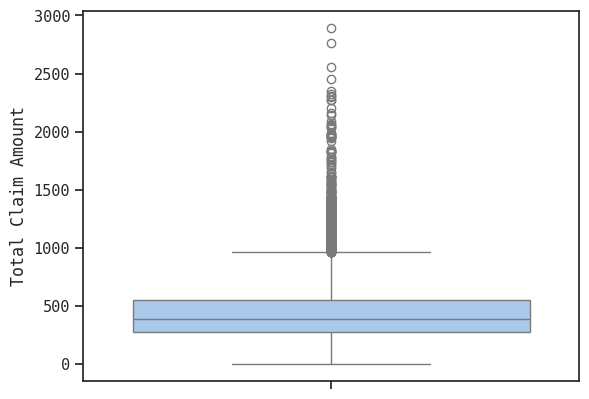

In [51]:
sns.boxplot(auto_insurance_df_copy_num['Total Claim Amount'])
plt.show()

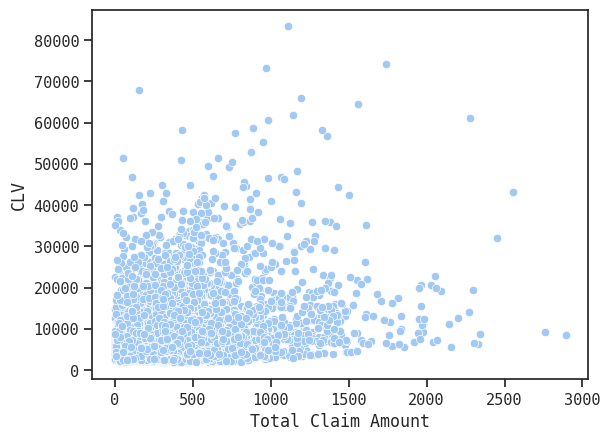

In [52]:
sns.scatterplot(x=auto_insurance_df_copy_num['Total Claim Amount'], y=auto_insurance_df_copy_num['CLV'])
plt.show()

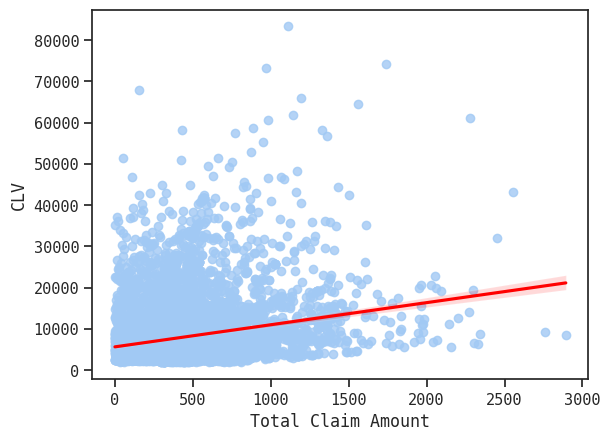

In [53]:
sns.regplot(x=auto_insurance_df_copy_num['Total Claim Amount'], y=auto_insurance_df_copy_num['CLV'],
            line_kws={'color':'red'})
plt.show()

In [54]:
# There is slightly linear relationship between Total Claim Amount and CLV.

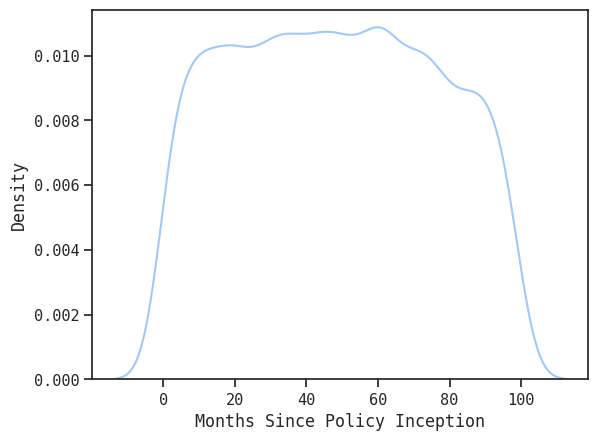

In [55]:
sns.kdeplot(auto_insurance_df_copy_num['Months Since Policy Inception'])
plt.show()

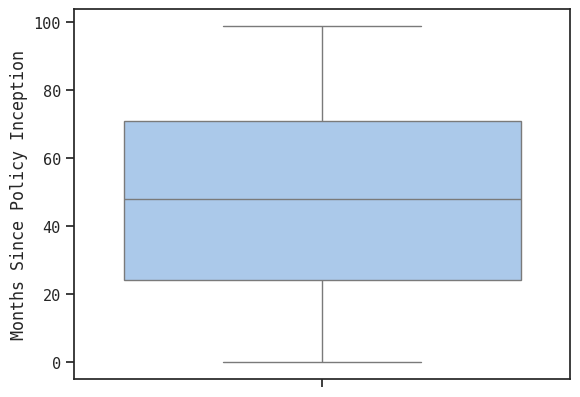

In [56]:
sns.boxplot(auto_insurance_df_copy_num['Months Since Policy Inception'])
plt.show()

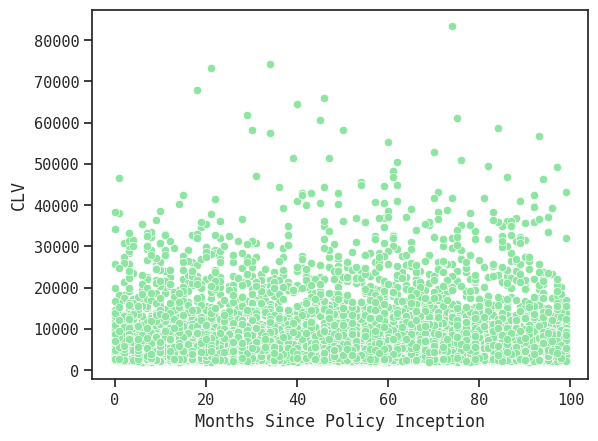

In [57]:
sns.scatterplot(x=auto_insurance_df_copy_num['Months Since Policy Inception'], y=auto_insurance_df_copy_num['CLV'] ,color='g')
plt.show()

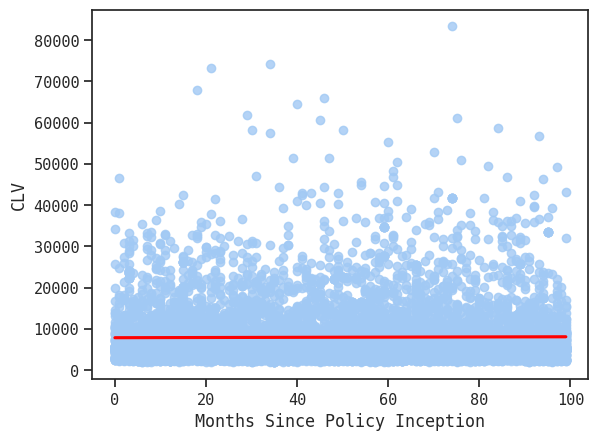

In [58]:
sns.regplot(x=auto_insurance_df_copy_num['Months Since Policy Inception'], y=auto_insurance_df_copy_num['CLV'],
            line_kws={'color':'red'})
plt.show()

In [59]:
# There is no linear relationship between Monthly Months Since Policy Inception and CLV.

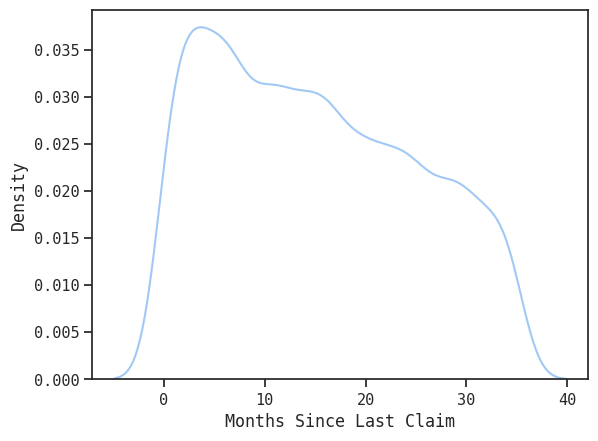

In [60]:
sns.kdeplot(auto_insurance_df_copy_num['Months Since Last Claim'])
plt.show()

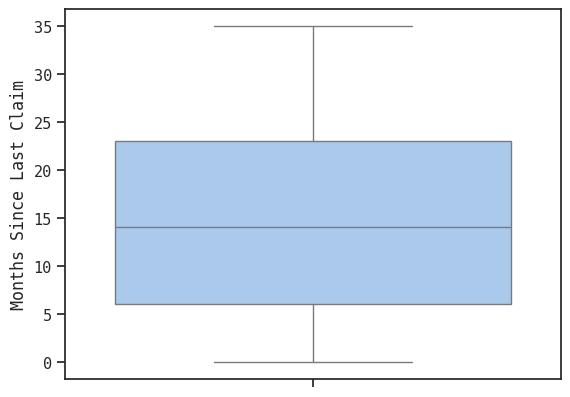

In [61]:
sns.boxplot(auto_insurance_df_copy_num['Months Since Last Claim'])
plt.show()

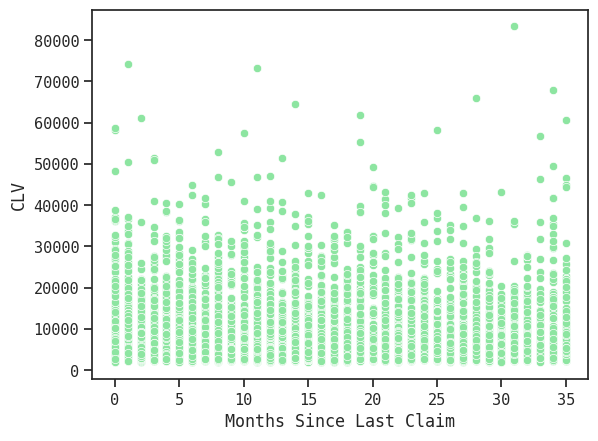

In [62]:
sns.scatterplot(x=auto_insurance_df_copy_num['Months Since Last Claim'], y=auto_insurance_df_copy_num['CLV'] ,color='g')
plt.show()

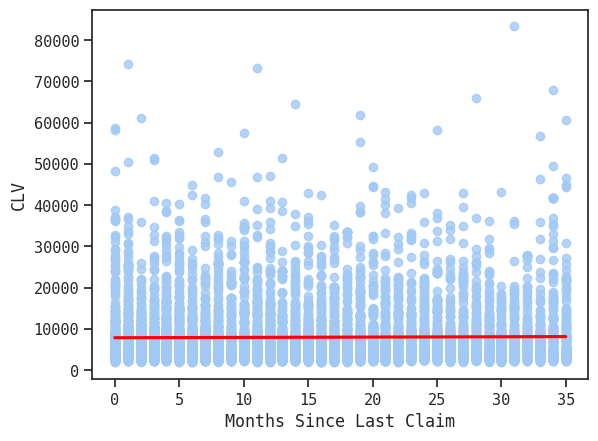

In [63]:
sns.regplot(x=auto_insurance_df_copy_num['Months Since Last Claim'], y=auto_insurance_df_copy_num['CLV'],
            line_kws={'color':'red'})
plt.show()

In [64]:
# There is no relationship in Months Since last claim and CLV

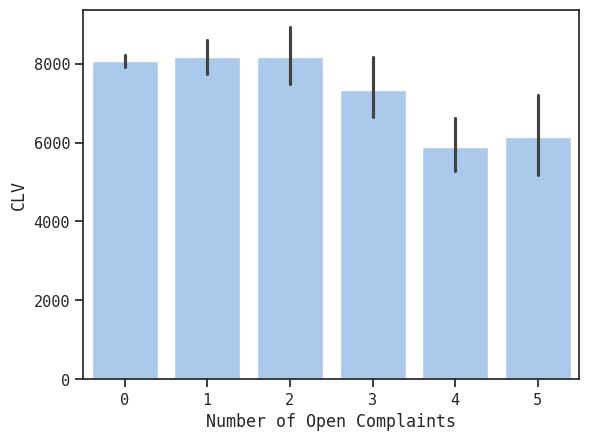

In [65]:
sns.barplot(x=auto_insurance_df_copy_num['Number of Open Complaints'], y=auto_insurance_df_copy_num['CLV'])
plt.show()

In [66]:
# We can see that average CLV is less for for customer having 3 or more compliants especially number of 4.

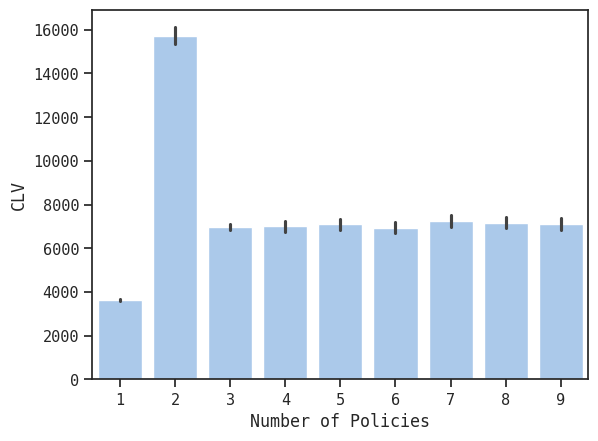

In [67]:
sns.barplot(x=auto_insurance_df_copy_num['Number of Policies'], y=auto_insurance_df_copy_num['CLV'])
plt.show()

In [68]:
# Average CLV is highest for customers having 2 number of policies while it is lowest for customer having 1 policies.
# while customer having more than 2 policies are all having almost same CLV.

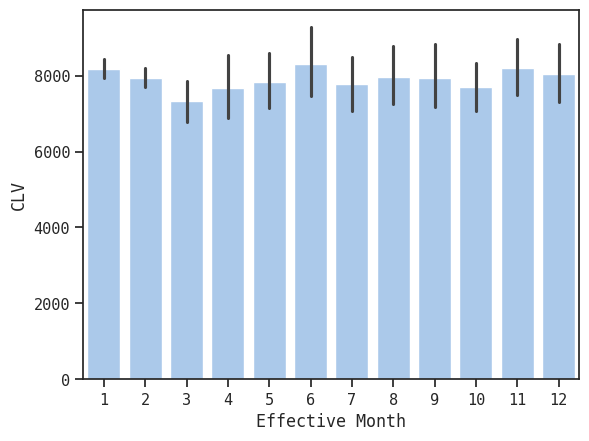

In [69]:
sns.barplot(x=auto_insurance_df_copy_num['Effective Month'], y=auto_insurance_df_copy_num['CLV'])
plt.show()

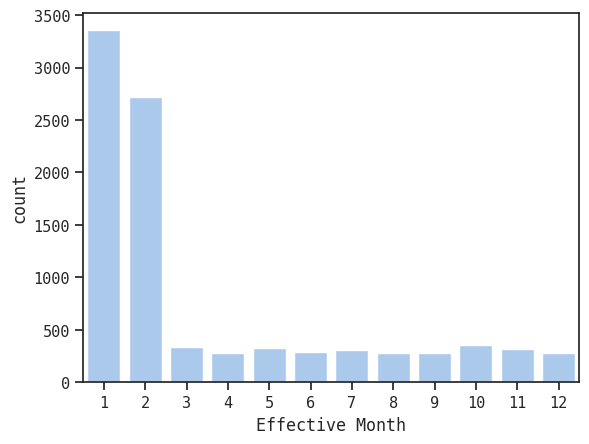

In [70]:
sns.countplot(x=auto_insurance_df_copy_num['Effective Month'])
plt.show()

In [71]:
# Highest average CLV is for june month and lowest for month march.
# But we can see that most of customer were active on either january and Feburary.

##### Categorical columns

In [72]:
auto_insurance_df_copy_cat = auto_insurance_df_copy.select_dtypes('O')

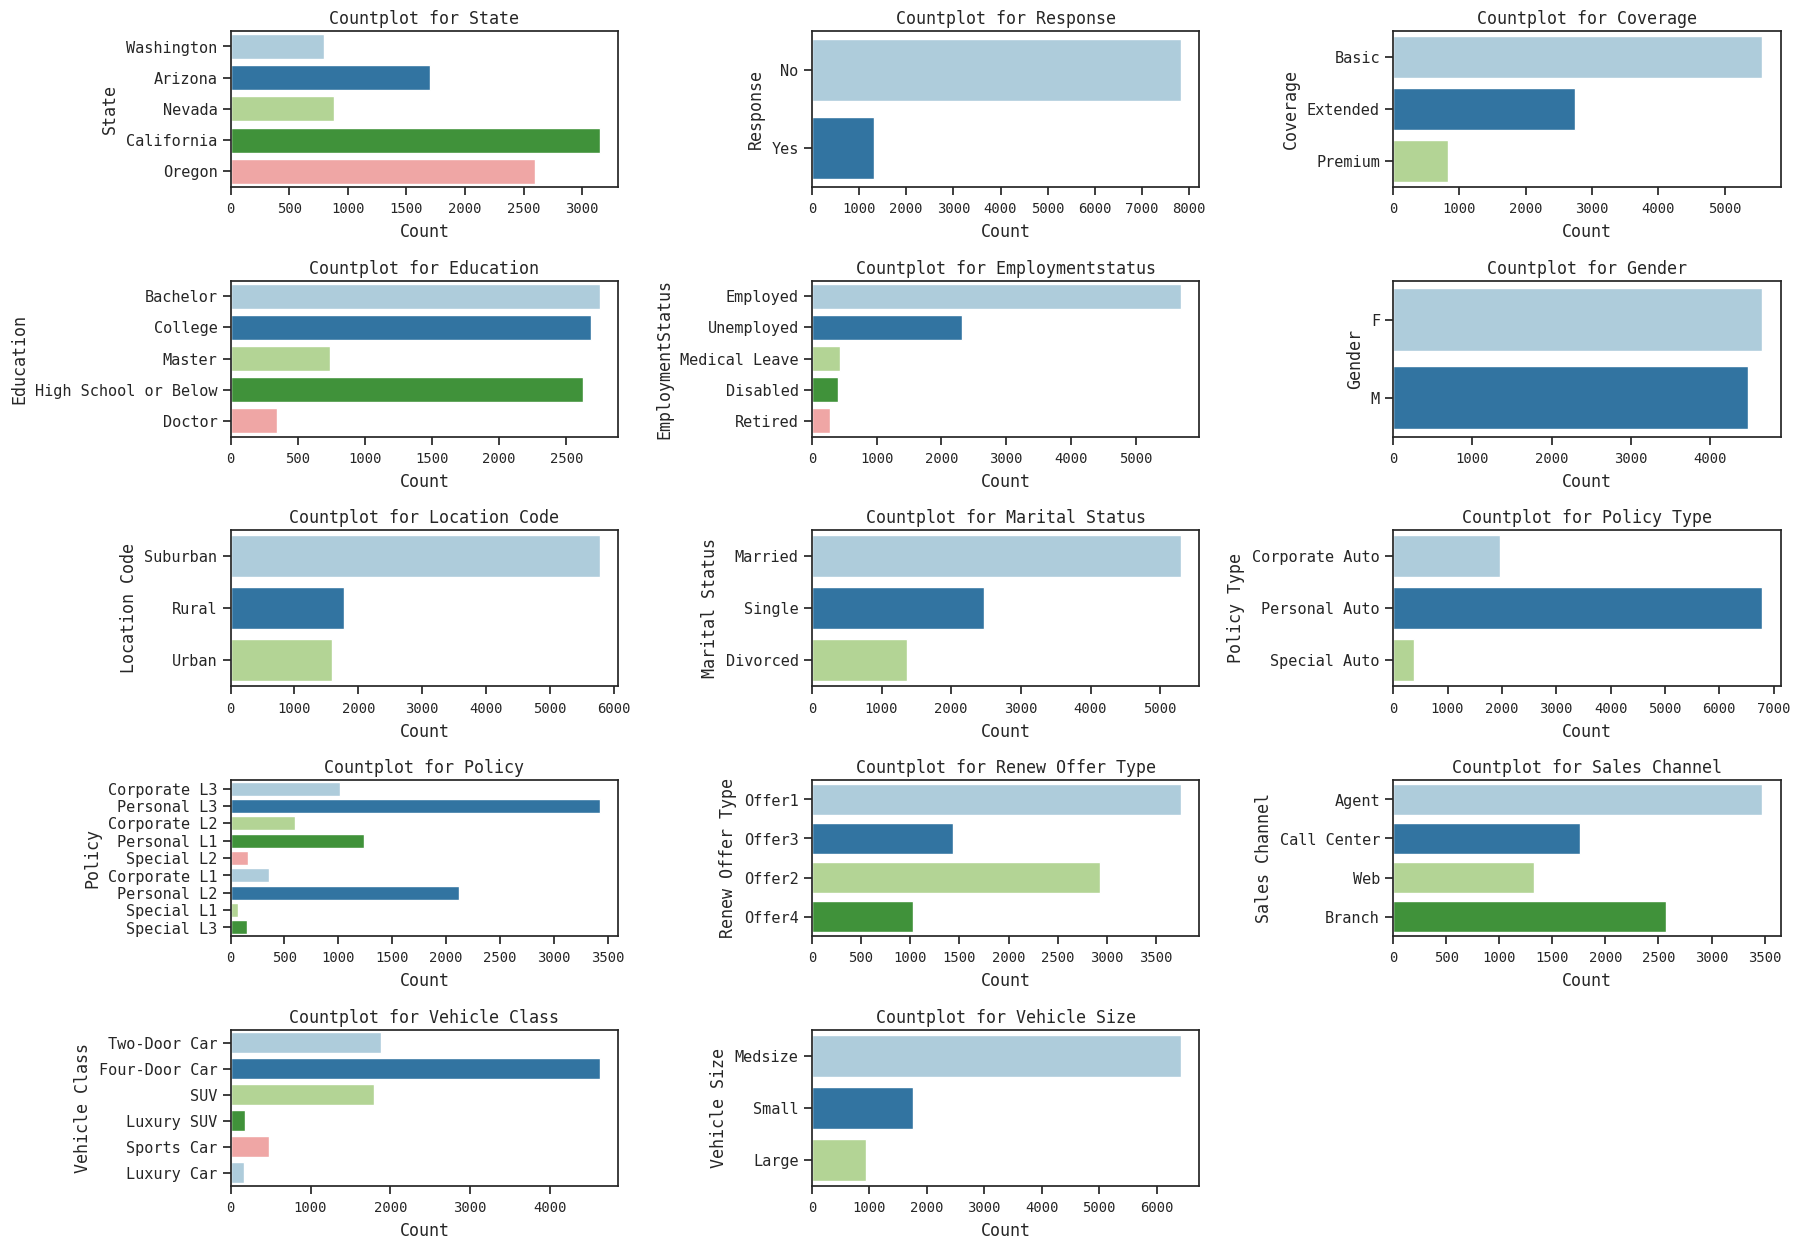

In [73]:
# Create a color palette with a unique color for each category
unique_categories = auto_insurance_df_copy_cat[auto_insurance_df_copy_cat.columns[0]].unique()
palette = sns.color_palette("Paired", n_colors=len(unique_categories))

# Create a figure and axes
fig, axes = plt.subplots(5, 3, figsize=(20, 15), sharey=False)

# Loop through each column and plot a count plot
for i, (col, ax) in enumerate(zip(auto_insurance_df_copy_cat.columns, axes.flatten())):
    # Get the unique values and their counts
    hue_order = auto_insurance_df_copy_cat[col].unique()
    
    # Plot with unique color for each bar
    sns.countplot(y=auto_insurance_df_copy_cat[col], ax=ax, palette=palette, order=hue_order)
    
    ax.set_title(f"Countplot for {col.title()}", fontsize=12, pad=5)
    ax.set_xlabel('Count', fontsize=12, labelpad=5)
    ax.set_ylabel(col, fontsize=12, labelpad=5)
    
    ax.tick_params(axis='x', which='major', pad=5, labelsize=10)

# Turn off unused subplots if there are fewer columns than axes
for j in range(len(auto_insurance_df_copy_cat.columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Adjust layout to prevent overlap with more space between plots
plt.subplots_adjust(wspace=0.5, hspace=0.6)

# Show the plot
plt.show()


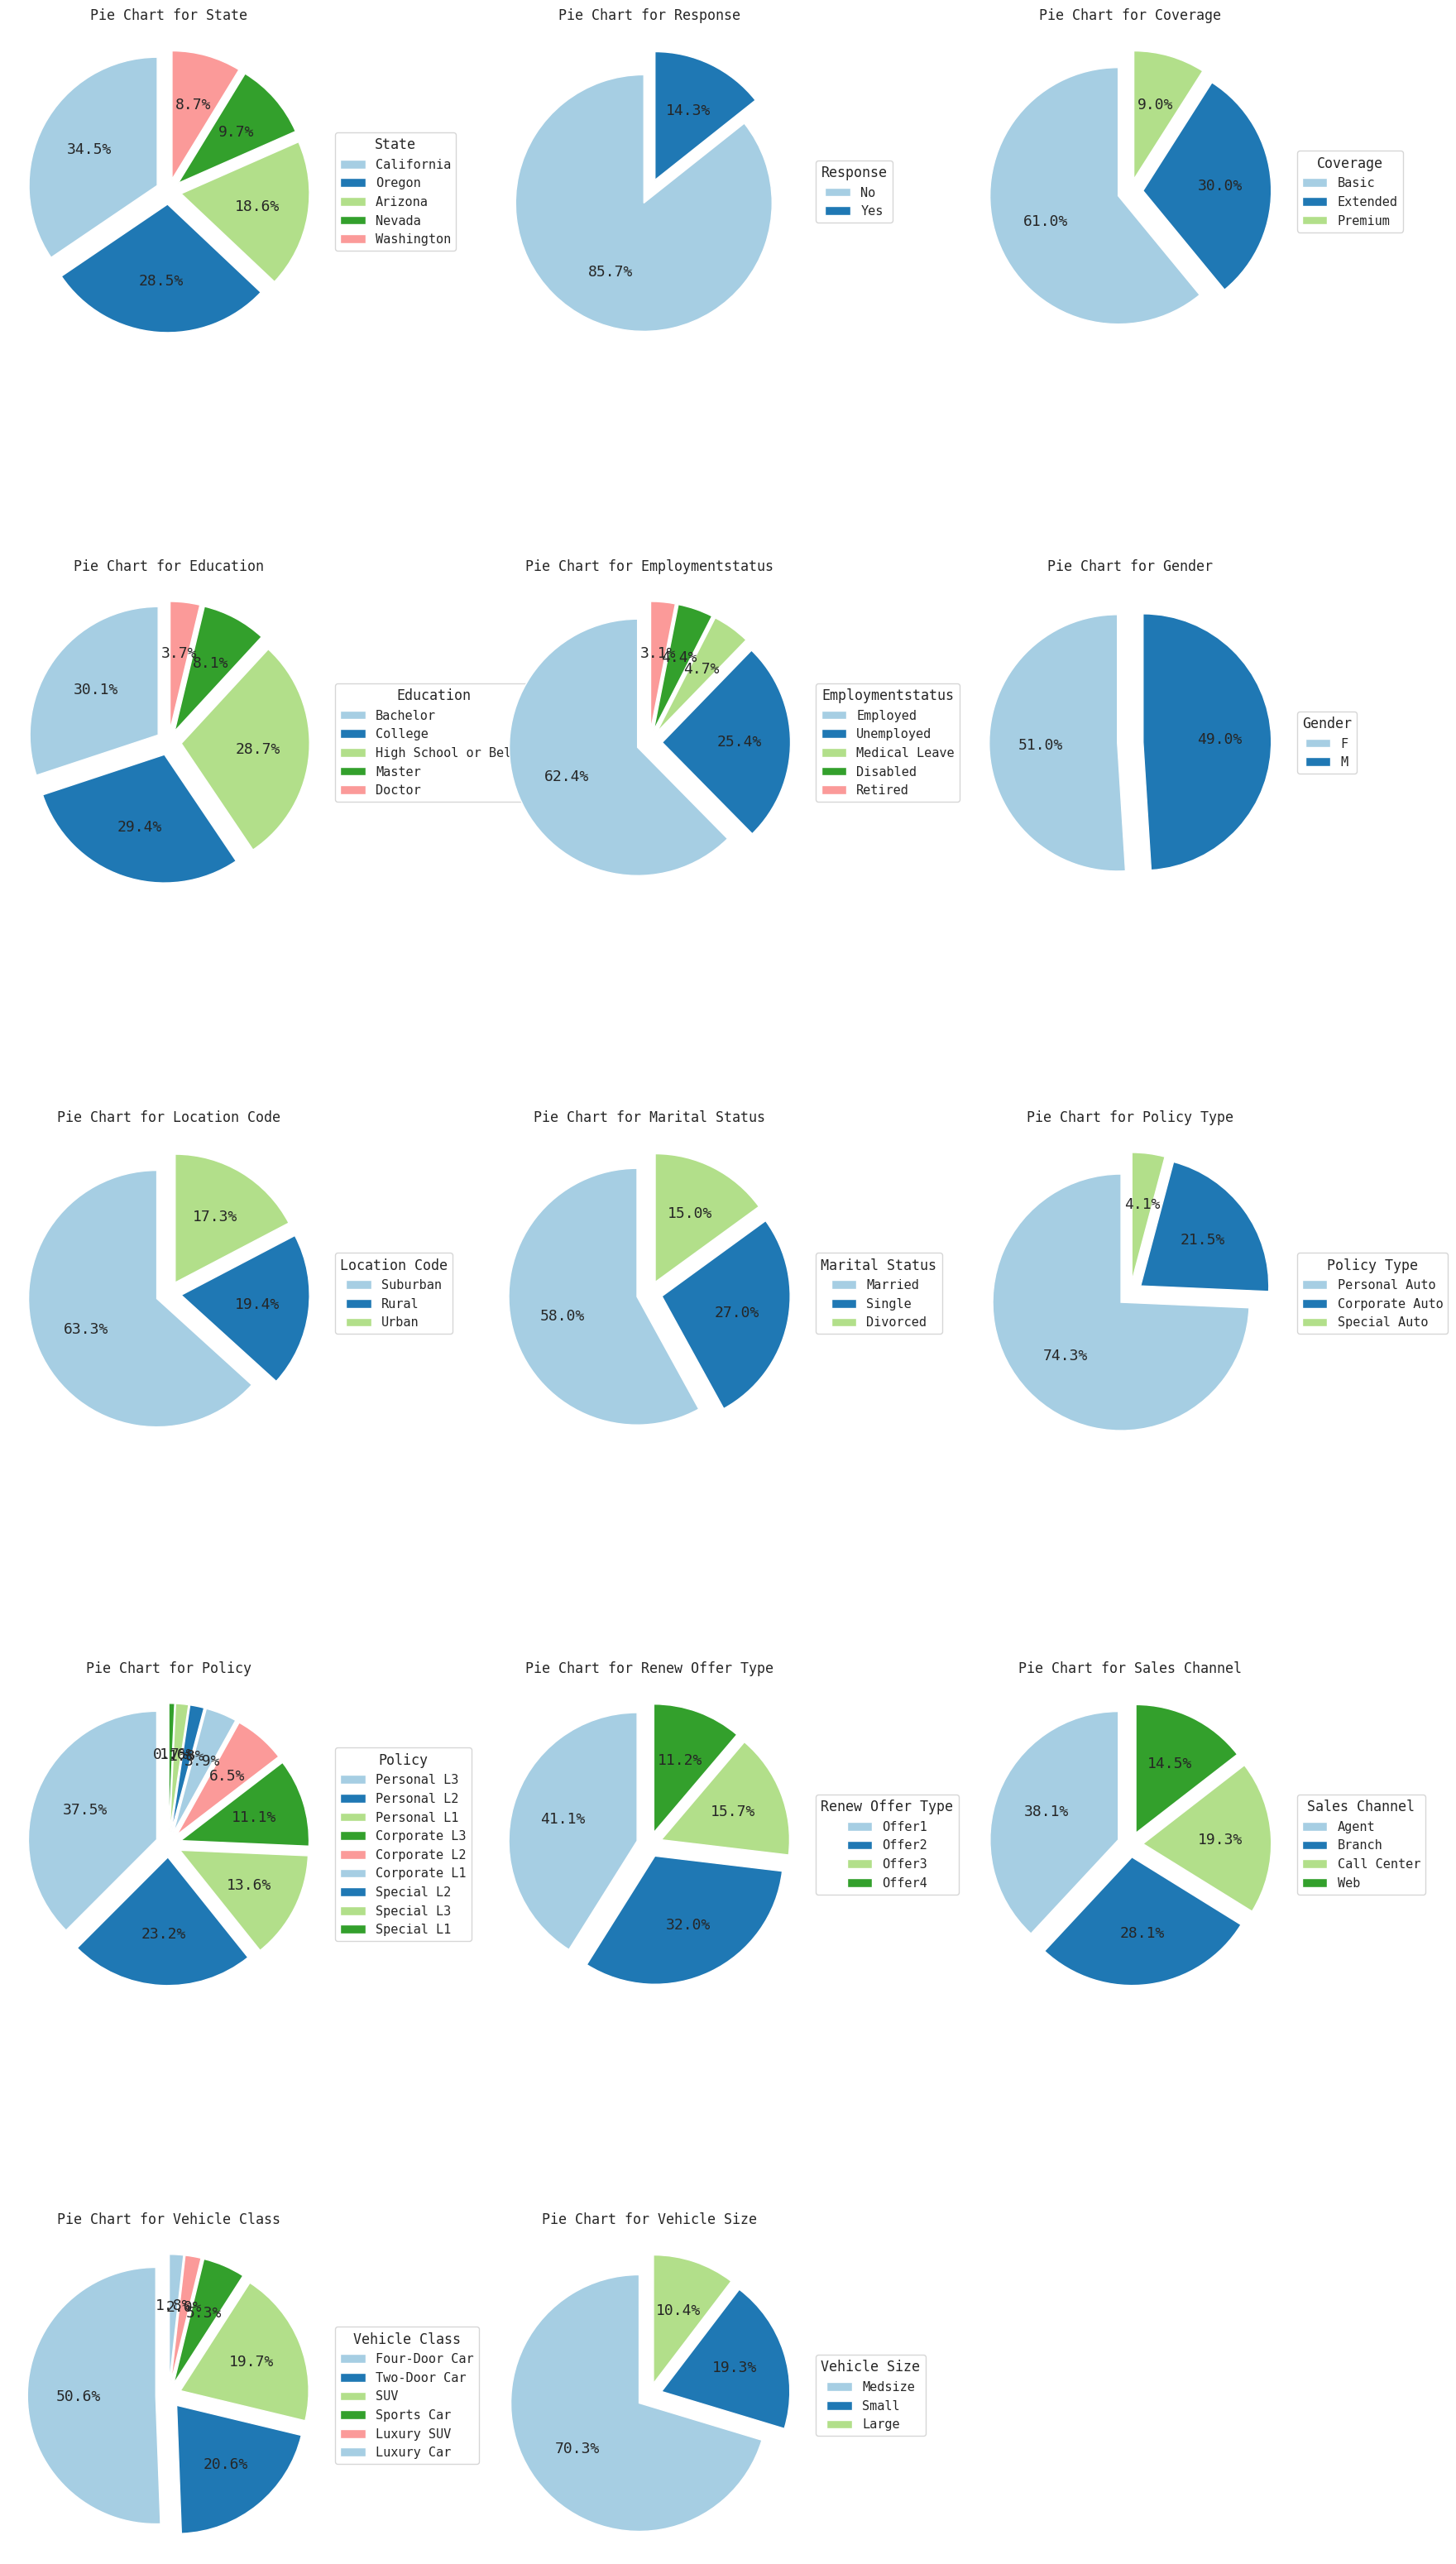

In [74]:
# Create a color palette with a unique color for each category
unique_categories = auto_insurance_df_copy_cat[auto_insurance_df_copy_cat.columns[0]].unique()
palette = sns.color_palette("Paired", n_colors=len(unique_categories))

# Create a figure and axes
fig, axes = plt.subplots(5, 3, figsize=(20, 40), sharey=False)

# Loop through each column and plot a pie chart
for i, (col, ax) in enumerate(zip(auto_insurance_df_copy_cat.columns, axes.flatten())):
    # Get the value counts and labels
    data = auto_insurance_df_copy_cat[col].value_counts()
    
    # Plot pie chart with adjustments
    wedges, texts, autotexts = ax.pie(
        data, 
        labels=None,  # Set to None if using legend for labels
        colors=palette[:len(data)], 
        autopct='%1.1f%%', 
        startangle=90,
        explode=[0.1] * len(data)  # Slightly explode each slice
    )
    
    # Adjust font size for percentage text
    for autotext in autotexts:
        autotext.set_fontsize(13)  # Set the font size to 8 or any smaller size you prefer
    
    # Add legend outside the pie chart
    ax.legend(
        wedges, 
        data.index, 
        title=col.title(), 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)  # Position legend outside the pie chart
    )
    
    ax.set_title(f"Pie Chart for {col.title()}", fontsize=12, pad=10)

# Turn off unused subplots if there are fewer columns than axes
for j in range(len(auto_insurance_df_copy_cat.columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Adjust layout to prevent overlap with more space between plots
plt.subplots_adjust(wspace=0.5, hspace=0.6)

# Show the plot
plt.show()


##### Let analyze the each column seperately

In [75]:
auto_insurance_df_copy_cat['Coverage'].value_counts()

Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

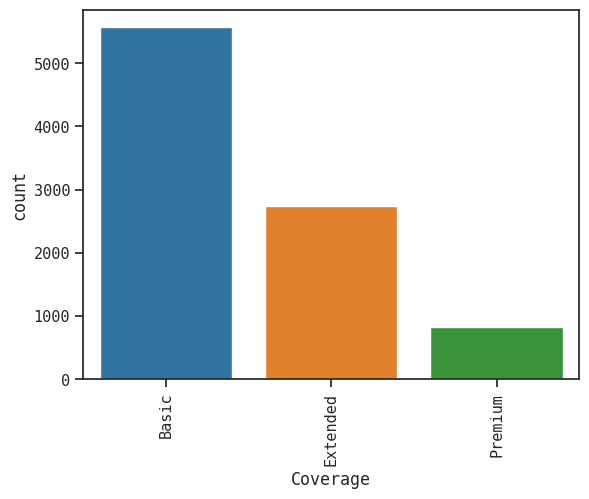

In [76]:
sns.countplot(x=auto_insurance_df_copy_cat['Coverage'],saturation=0.75,palette='tab10', fill=True,stat='count')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

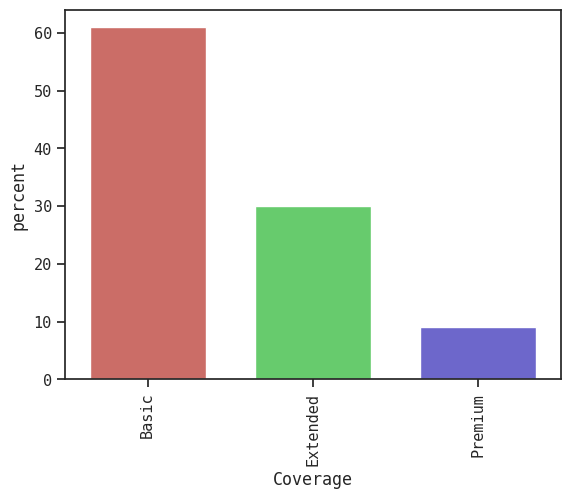

In [77]:
sns.countplot(x=auto_insurance_df_copy_cat['Coverage'],saturation=0.75,palette='hls', fill=True,stat='percent',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

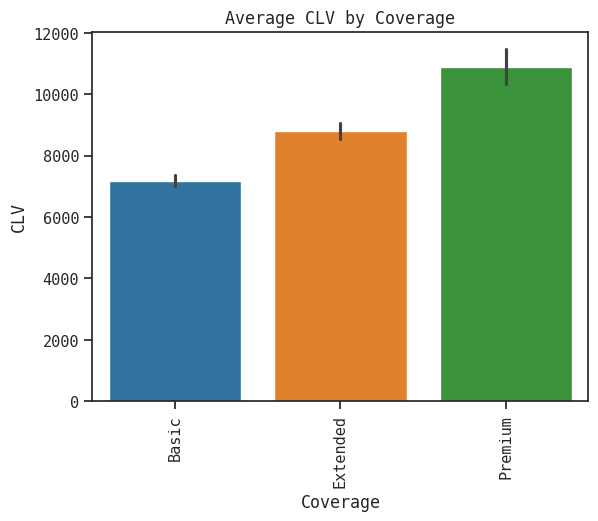

In [78]:
plt.title('Average CLV by Coverage')
sns.barplot(x=auto_insurance_df_copy_cat['Coverage'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [79]:
# most the records having coverage as basic with around 60% of total records followed by Extended and premium 
# with around 30% and around 10% respectively.
# Average CLV for premium coverage is higher than other type of coverage.

In [80]:
auto_insurance_df_copy_cat['Education'].value_counts()

Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

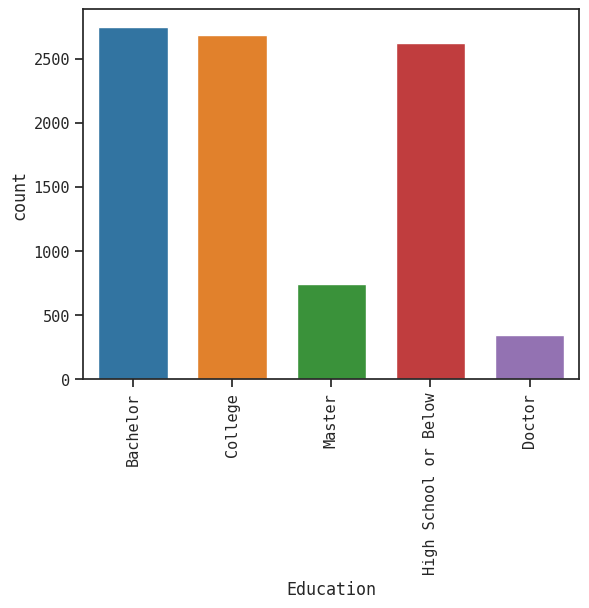

In [81]:
sns.countplot(x=auto_insurance_df_copy_cat['Education'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')

plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

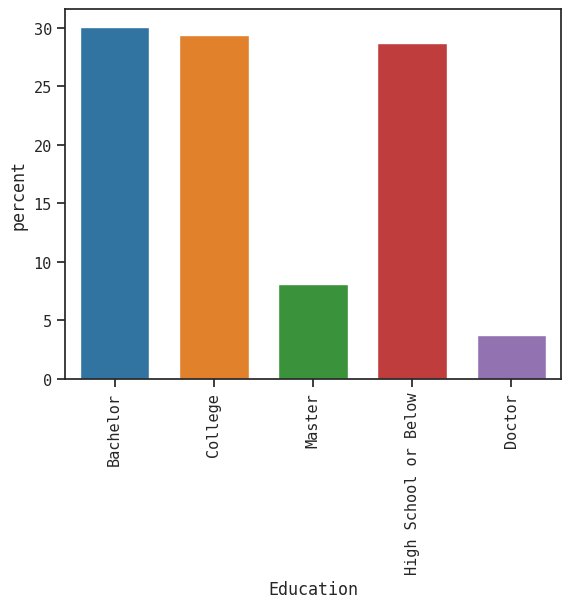

In [82]:
sns.countplot(x=auto_insurance_df_copy_cat['Education'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')

plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

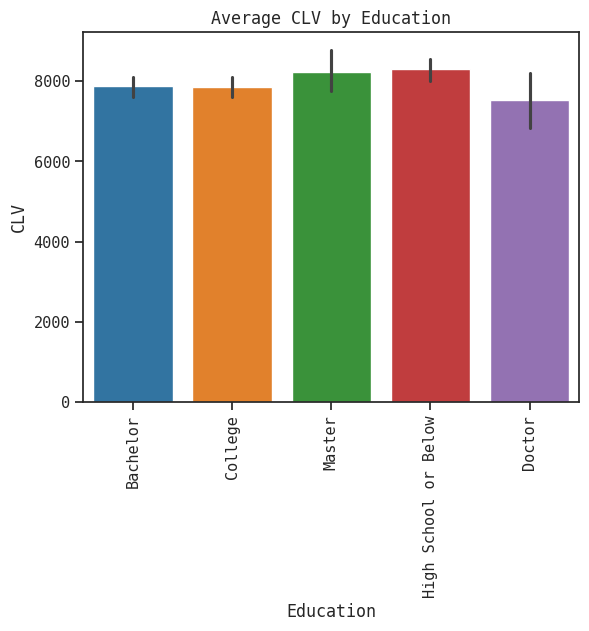

In [83]:
plt.title('Average CLV by Education')
sns.barplot(x=auto_insurance_df_copy_cat['Education'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [84]:
# Most of the customer does not higher education like Master and Doctor with only 10% of overall customer have done higher 
# studies.
# Average CLV for customer is almost same for eductation class but slightly lower for customer having Doctor 

In [85]:
auto_insurance_df_copy_cat['EmploymentStatus'].value_counts()

EmploymentStatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

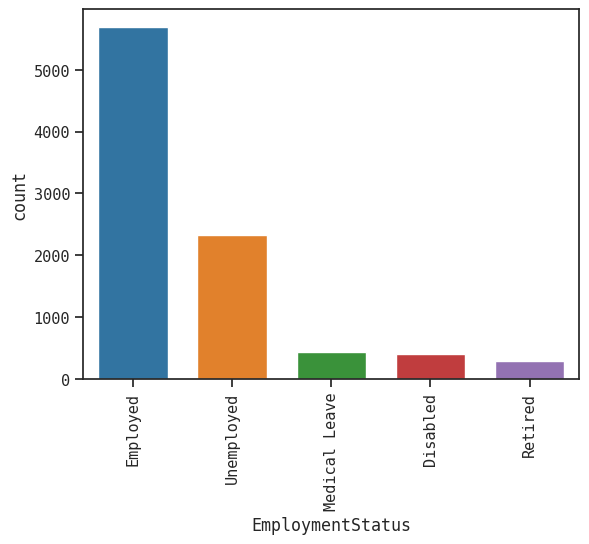

In [86]:
sns.countplot(x=auto_insurance_df_copy_cat['EmploymentStatus'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')

plt.setp(plt.gca().get_xticklabels(), rotation=90)

plt.show()

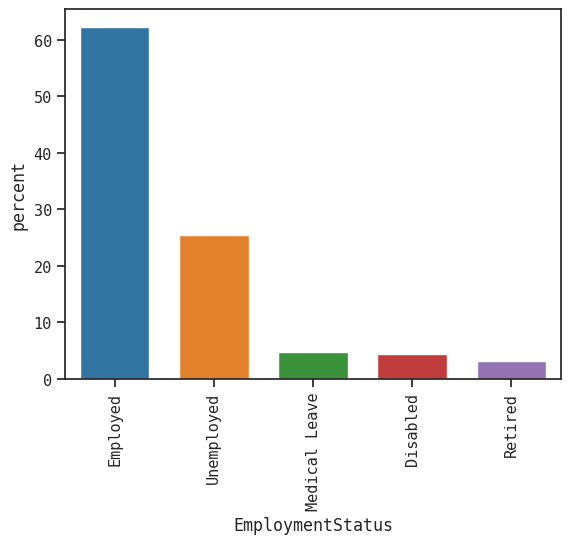

In [87]:
sns.countplot(x=auto_insurance_df_copy_cat['EmploymentStatus'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')

plt.setp(plt.gca().get_xticklabels(), rotation=90)

plt.show()

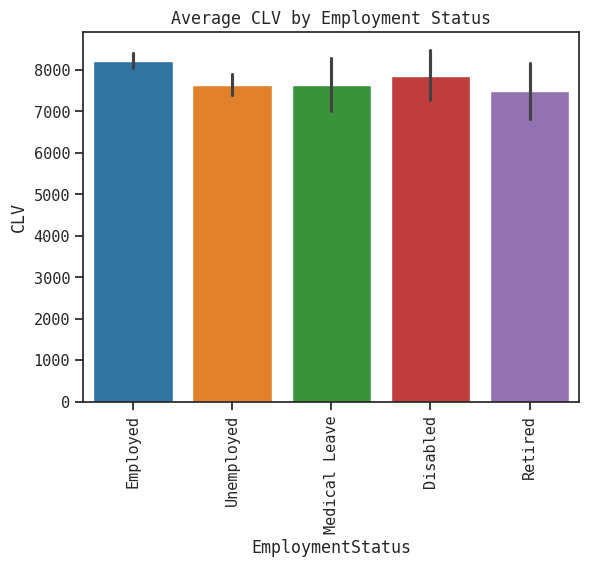

In [88]:
plt.title('Average CLV by Employment Status')
sns.barplot(x=auto_insurance_df_copy_cat['EmploymentStatus'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [89]:
# Average CLV is same for all the type of employment status while the number of records for employed is almost 60%.

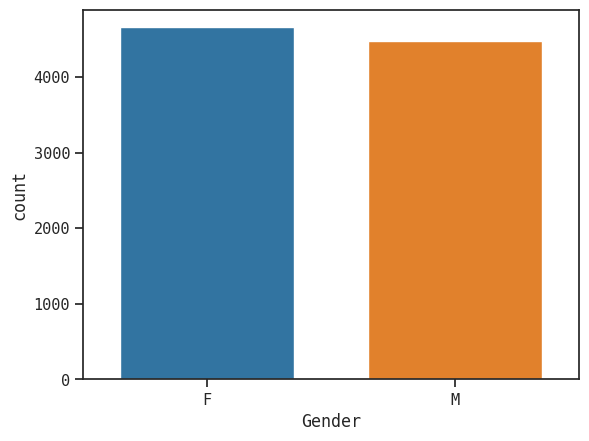

In [90]:
sns.countplot(x=auto_insurance_df_copy_cat['Gender'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.show()

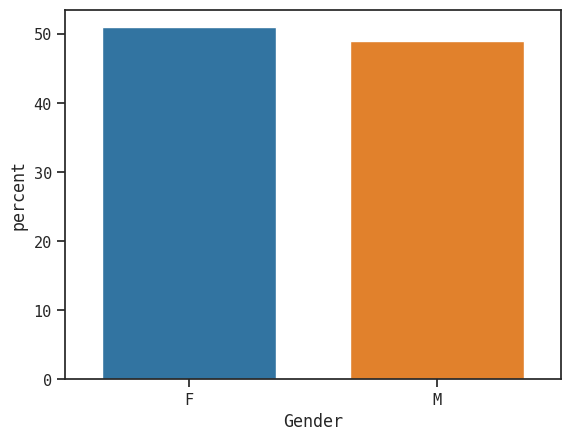

In [91]:
sns.countplot(x=auto_insurance_df_copy_cat['Gender'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.show()

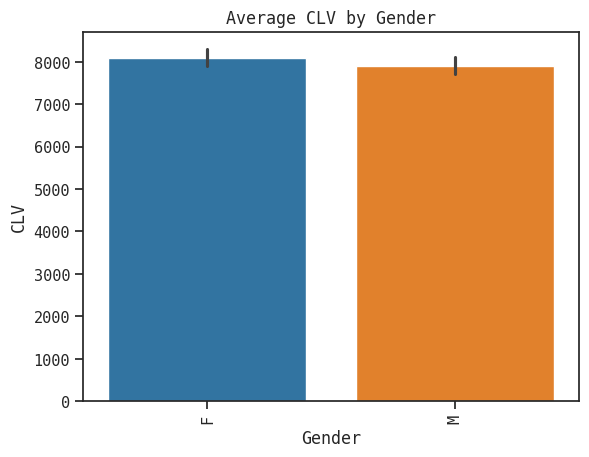

In [92]:
plt.title('Average CLV by Gender')
sns.barplot(x=auto_insurance_df_copy_cat['Gender'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [93]:
# for gender we can see same average CLV for both gender and number of records for female is slightly more than male.

In [94]:
auto_insurance_df_copy_cat['Location Code'].value_counts()

Location Code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

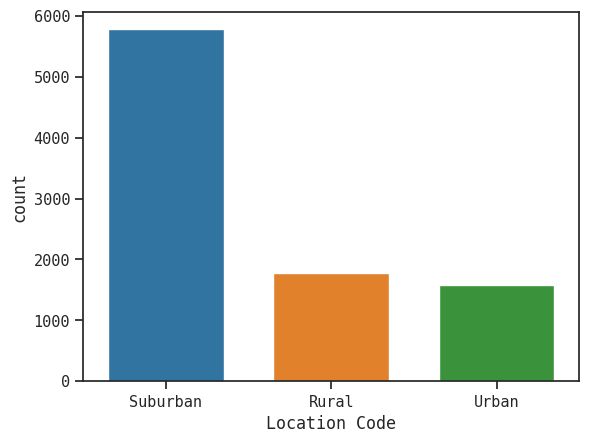

In [95]:
sns.countplot(x=auto_insurance_df_copy_cat['Location Code'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.show()

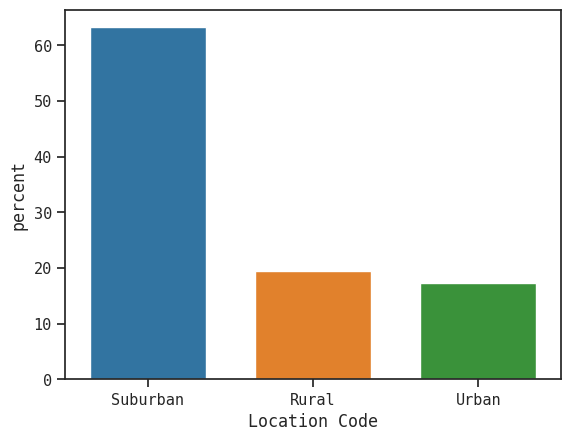

In [96]:
sns.countplot(x=auto_insurance_df_copy_cat['Location Code'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.show()

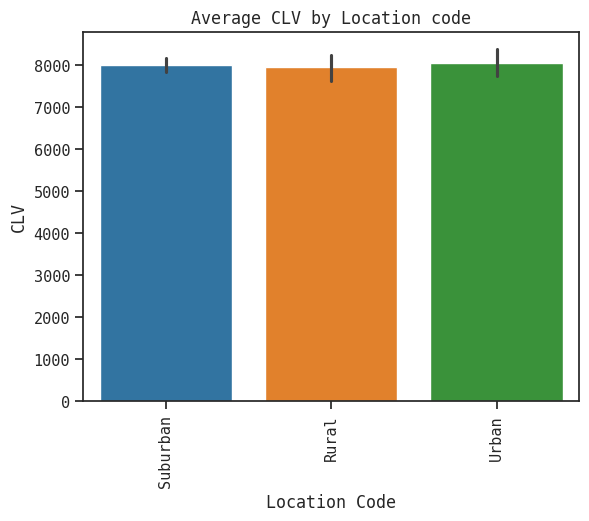

In [97]:
plt.title('Average CLV by Location code')
sns.barplot(x=auto_insurance_df_copy_cat['Location Code'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [98]:
# Average CLV in Suburban, Rural and Urban is almost but customer living suburban area.

In [99]:
auto_insurance_df_copy_cat['Marital Status'].value_counts()

Marital Status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

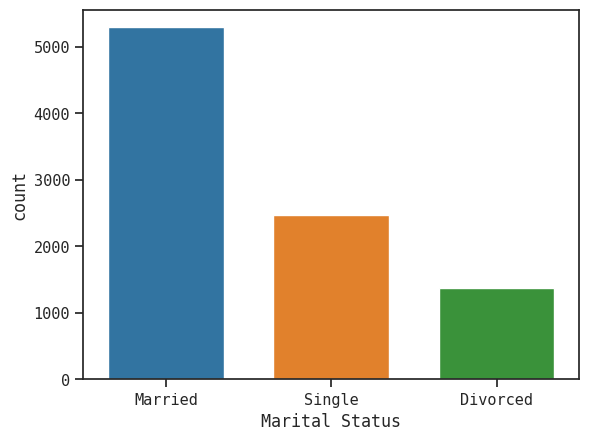

In [100]:
sns.countplot(x=auto_insurance_df_copy_cat['Marital Status'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.show()

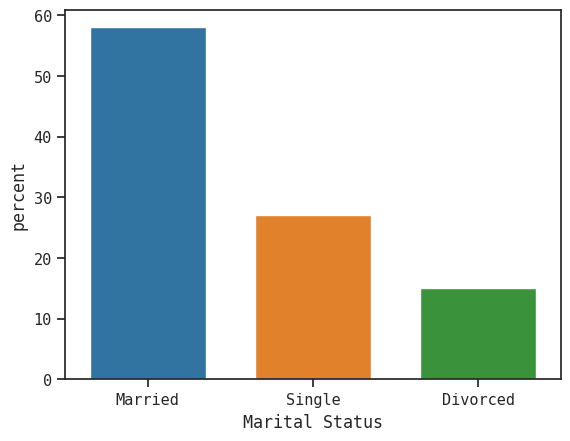

In [101]:
sns.countplot(x=auto_insurance_df_copy_cat['Marital Status'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.show()

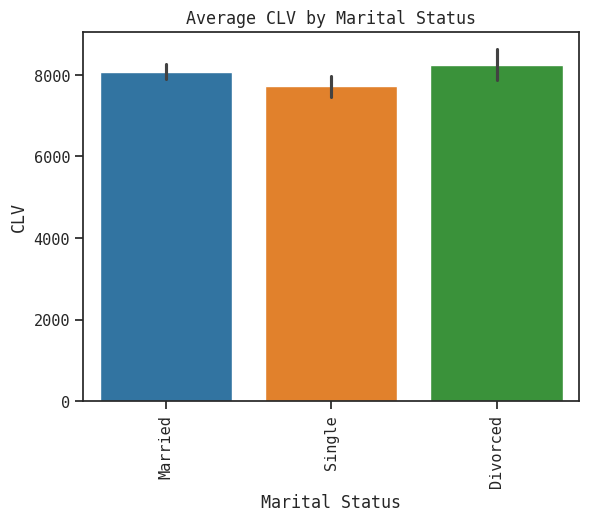

In [102]:
plt.title('Average CLV by Marital Status')
sns.barplot(x=auto_insurance_df_copy_cat['Marital Status'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [103]:
# Average CLV for Married, Single and Divored customer but most of the customer are married.

In [104]:
auto_insurance_df_copy_cat['Policy'].value_counts()

Policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

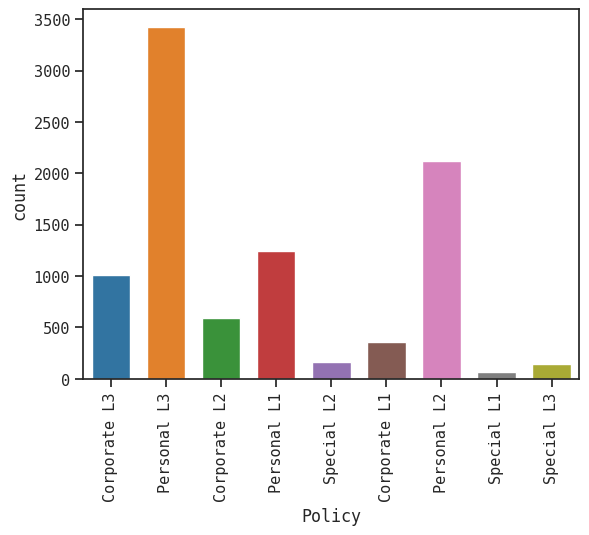

In [105]:
sns.countplot(x=auto_insurance_df_copy_cat['Policy'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

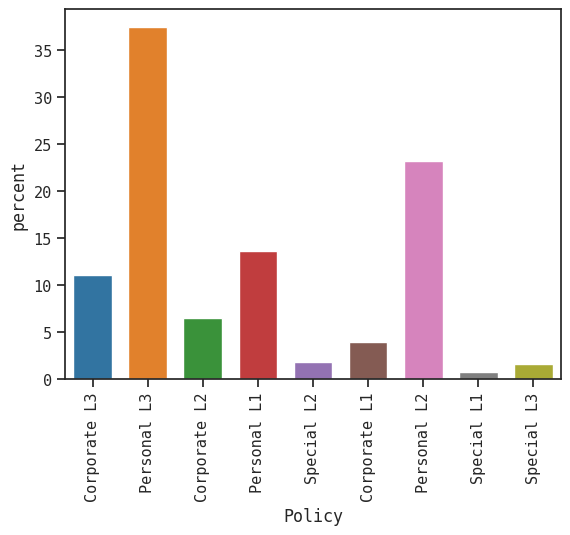

In [106]:
sns.countplot(x=auto_insurance_df_copy_cat['Policy'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

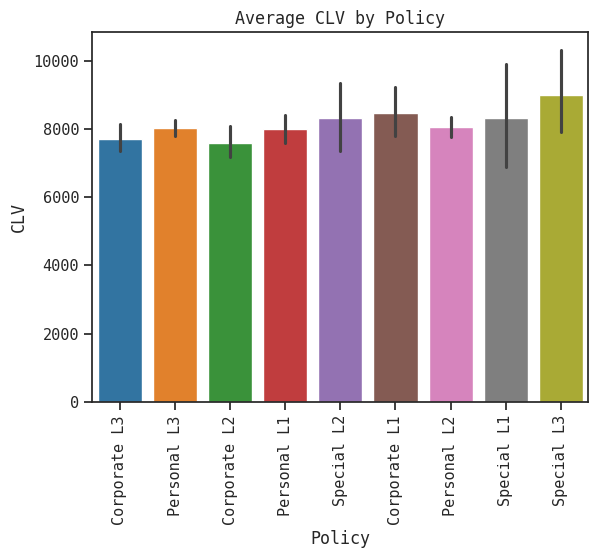

In [107]:
plt.title('Average CLV by Policy')
sns.barplot(x=auto_insurance_df_copy_cat['Policy'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [108]:
# The data having most record for personal L3 policy and special L3 policy has highest average CLV

In [109]:
auto_insurance_df_copy_cat['Policy Type'].value_counts()

Policy Type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64

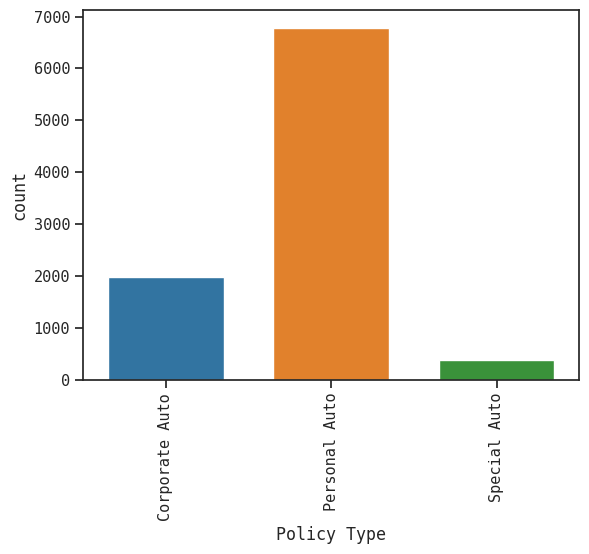

In [110]:
sns.countplot(x=auto_insurance_df_copy_cat['Policy Type'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

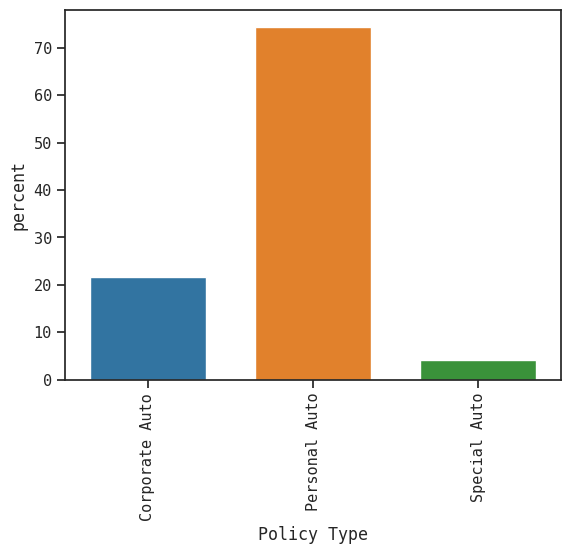

In [111]:
sns.countplot(x=auto_insurance_df_copy_cat['Policy Type'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

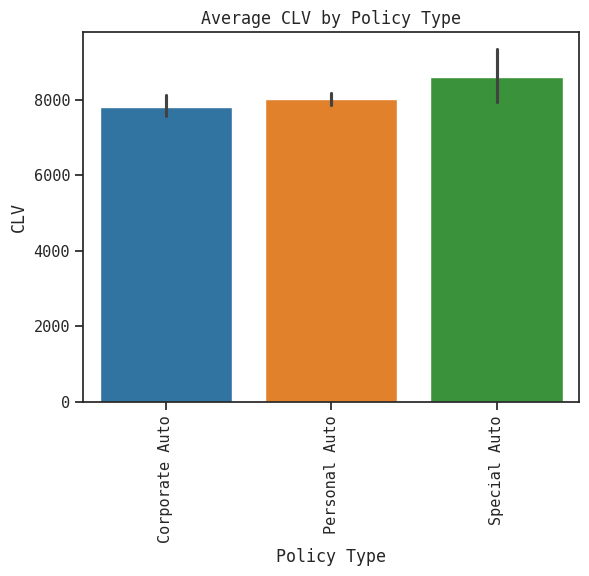

In [112]:
plt.title('Average CLV by Policy Type')
sns.barplot(x=auto_insurance_df_copy_cat['Policy Type'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [113]:
# Customer having policy type as special auto is having highest average CLV but has very less records.
# while number of records were maximum for personal auto.

In [114]:
auto_insurance_df_copy_cat['Renew Offer Type'].value_counts()

Renew Offer Type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: count, dtype: int64

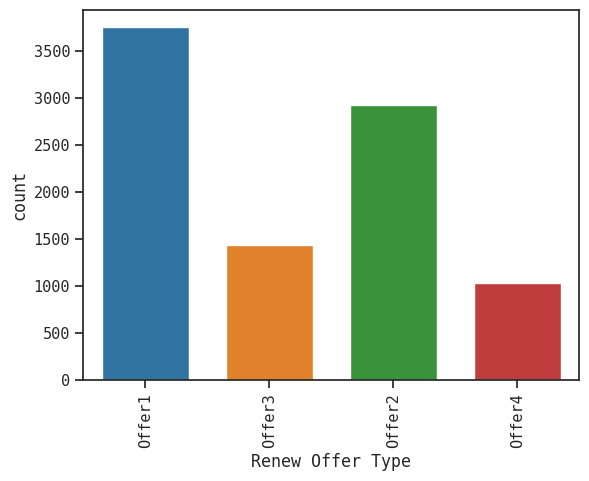

In [115]:
sns.countplot(x=auto_insurance_df_copy_cat['Renew Offer Type'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

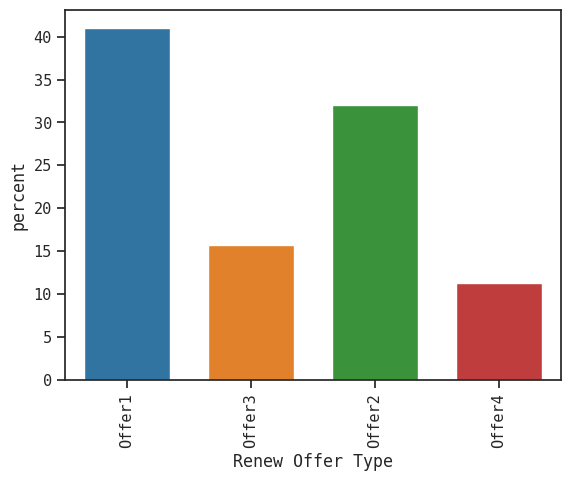

In [116]:
sns.countplot(x=auto_insurance_df_copy_cat['Renew Offer Type'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

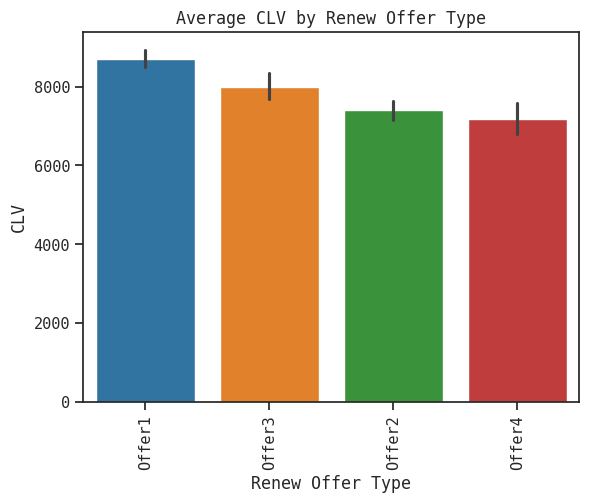

In [117]:
plt.title('Average CLV by Renew Offer Type')
sns.barplot(x=auto_insurance_df_copy_cat['Renew Offer Type'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [118]:
# offer1 have 40% of records and have the highest average CLV.
# offer2 and offer4 average CLV is quite comparation but offer2 have 20% more customers.

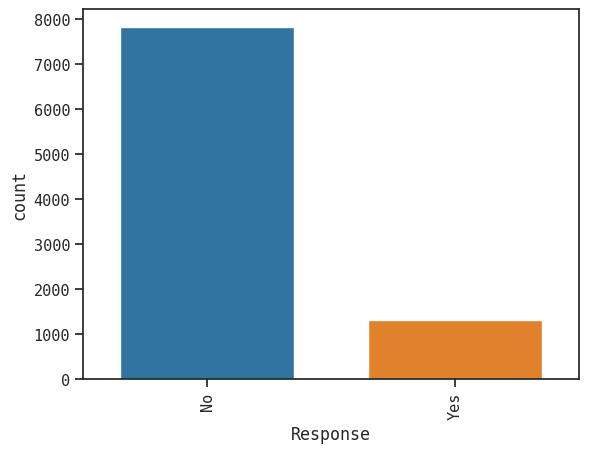

In [119]:
sns.countplot(x=auto_insurance_df_copy_cat['Response'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

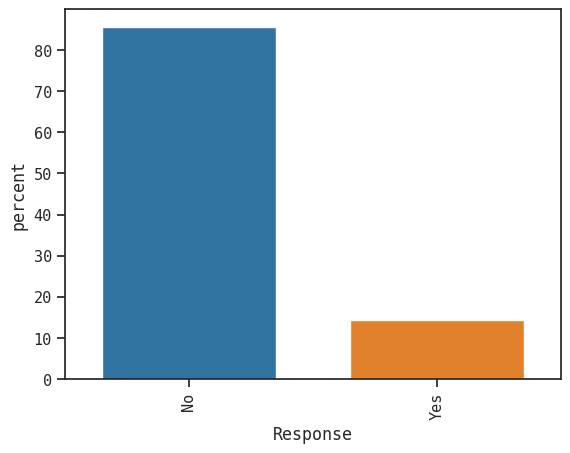

In [120]:
sns.countplot(x=auto_insurance_df_copy_cat['Response'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

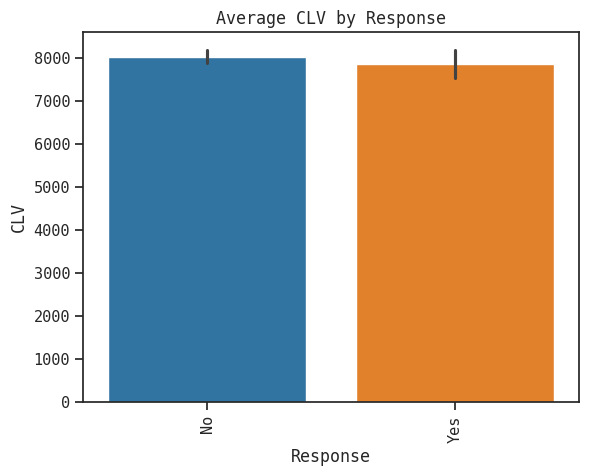

In [121]:
plt.title('Average CLV by Response')
sns.barplot(x=auto_insurance_df_copy_cat['Response'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [122]:
# There is hardly any difference in average CLV between Response as yes or no although most of the records having reponse
# as no

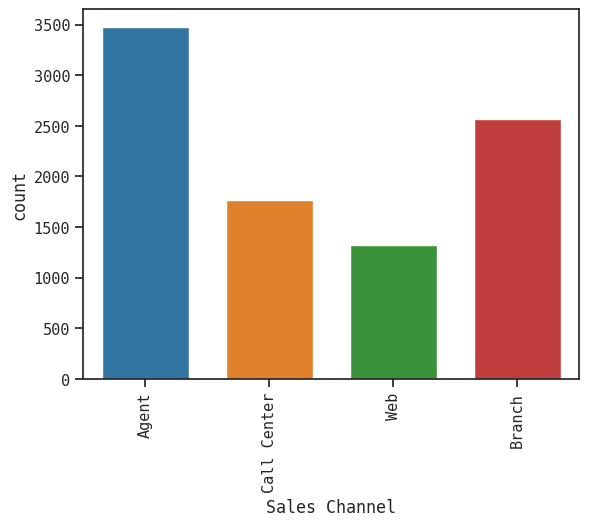

In [123]:
sns.countplot(x=auto_insurance_df_copy_cat['Sales Channel'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

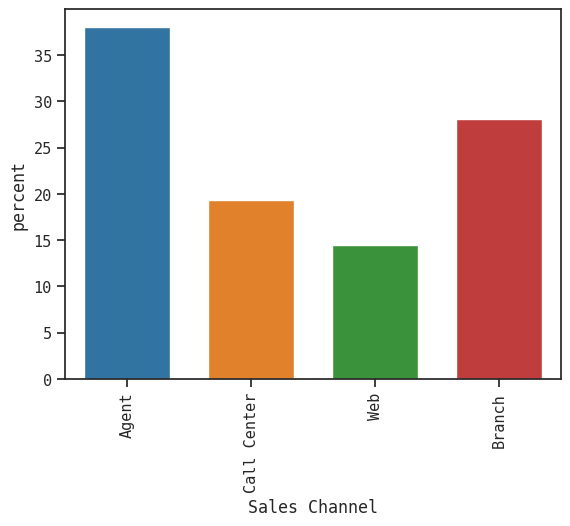

In [124]:
sns.countplot(x=auto_insurance_df_copy_cat['Sales Channel'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

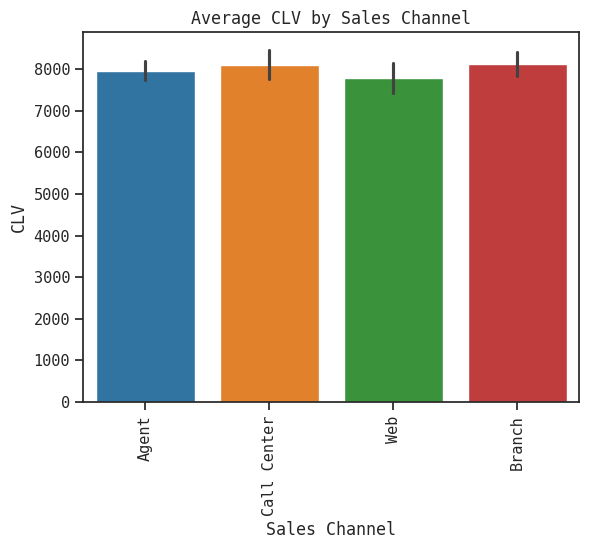

In [125]:
plt.title('Average CLV by Sales Channel')
sns.barplot(x=auto_insurance_df_copy_cat['Sales Channel'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [126]:
# As per data most of the customer reach through Agent and branch sales channel but Avrage CLV is highest for customer
# reach from call centers.

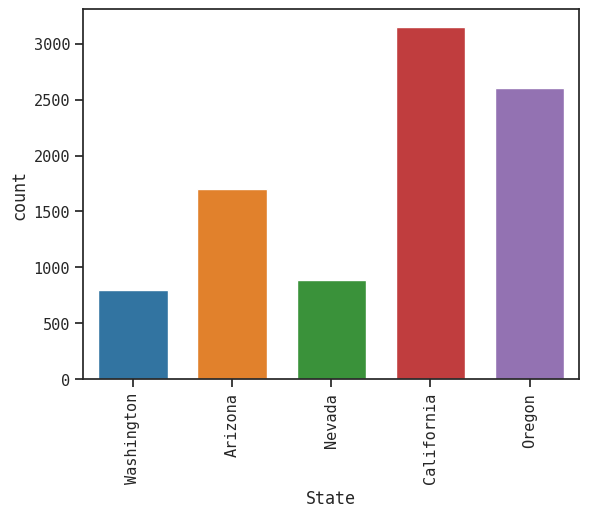

In [127]:
sns.countplot(x=auto_insurance_df_copy_cat['State'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

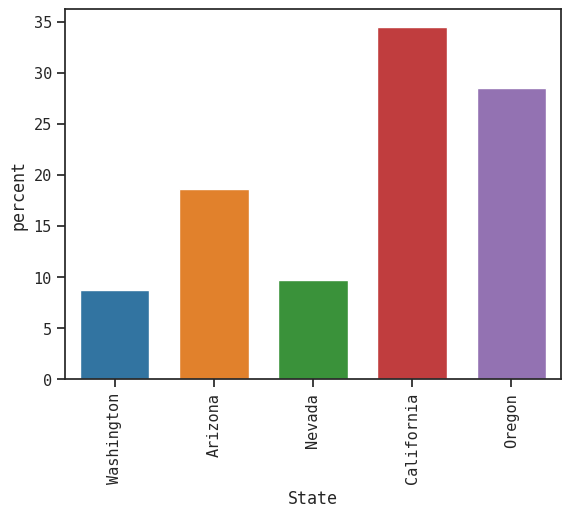

In [128]:
sns.countplot(x=auto_insurance_df_copy_cat['State'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

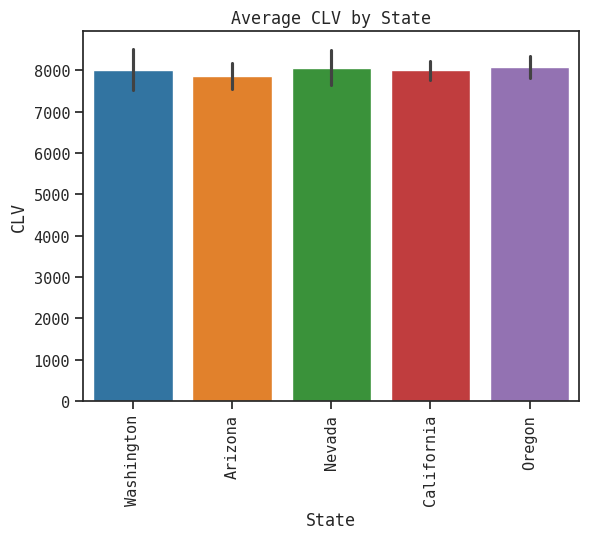

In [129]:
plt.title('Average CLV by State')
sns.barplot(x=auto_insurance_df_copy_cat['State'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [130]:
# number of customer in calafornia is more than other state but the average CLV is greater than Nevada.


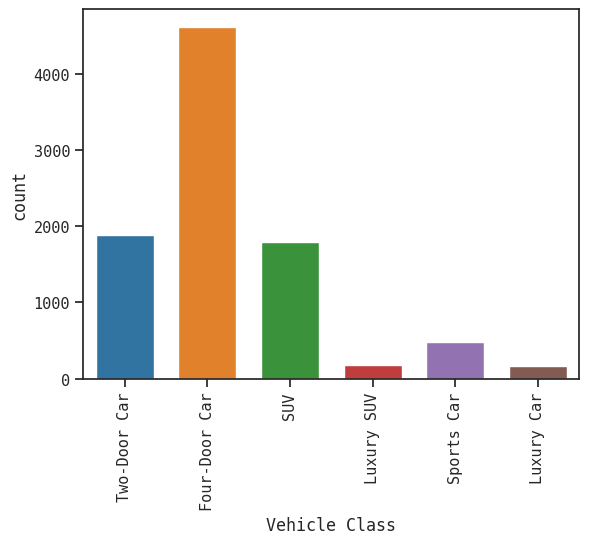

In [131]:
sns.countplot(x=auto_insurance_df_copy_cat['Vehicle Class'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

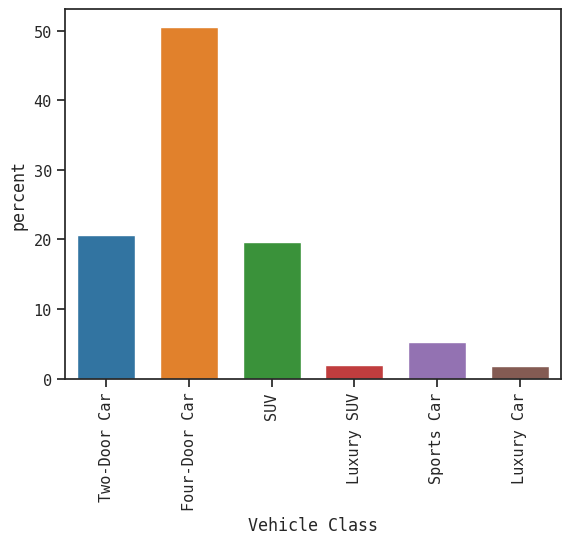

In [132]:
sns.countplot(x=auto_insurance_df_copy_cat['Vehicle Class'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

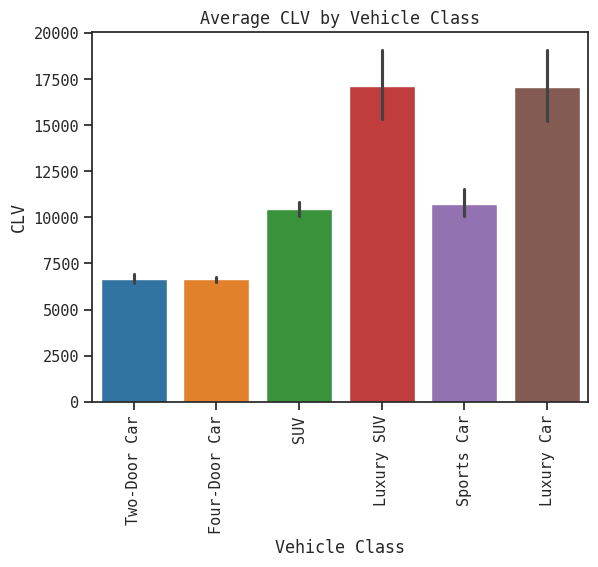

In [133]:
plt.title('Average CLV by Vehicle Class')
sns.barplot(x=auto_insurance_df_copy_cat['Vehicle Class'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [134]:
#Customer having four-Door Car is having most number of records but least average CLV while Luxury car and SUV have 
# least number of records but highest average CLV.

In [135]:
auto_insurance_df_copy_cat['Vehicle Size'].value_counts()

Vehicle Size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64

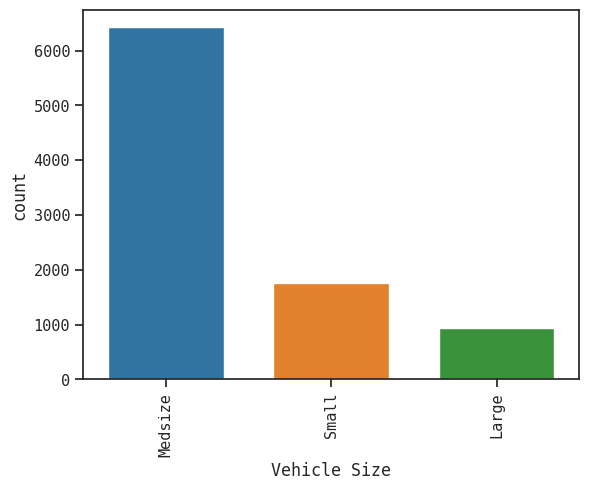

In [136]:
sns.countplot(x=auto_insurance_df_copy_cat['Vehicle Size'],saturation=0.75,palette='tab10', fill=True,stat='count',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

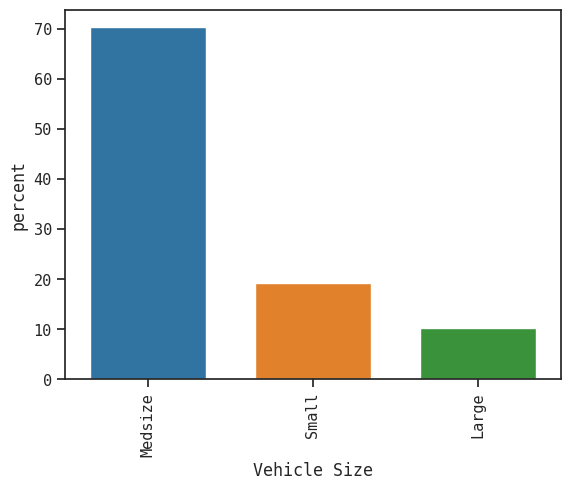

In [137]:
sns.countplot(x=auto_insurance_df_copy_cat['Vehicle Size'],saturation=0.75,palette='tab10', fill=True,stat='percent',
              width=0.7,orient='y')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

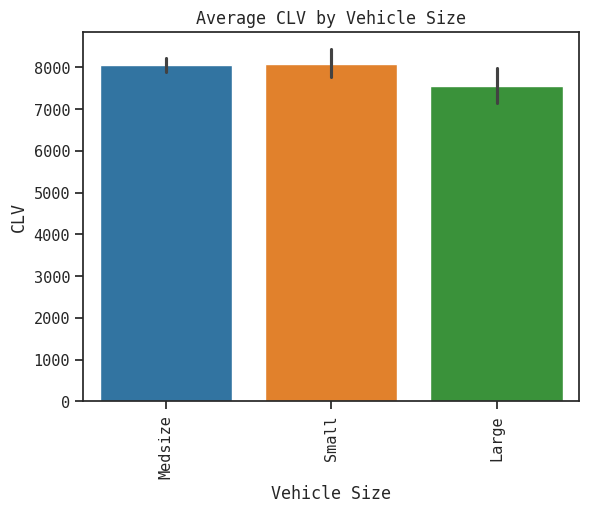

In [138]:
plt.title('Average CLV by Vehicle Size')
sns.barplot(x=auto_insurance_df_copy_cat['Vehicle Size'], y=auto_insurance_df_copy_num['CLV'],palette='tab10')
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

In [139]:
# Number of records for customer having medsize vehicle is more than any other vehicle size.
# Number of records for customer having large size vehicle is less and average CLV is also lesser than other size vehicle. 

In [140]:
auto_insurance_df_copy.head(1)

State          CLV Response Coverage Education EmploymentStatus  \
0  Washington 2763.5192790       No    Basic  Bachelor         Employed   

  Gender  Income Location Code Marital Status  Monthly Premium Auto  \
0      F   56274      Suburban        Married                    69   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   

   Number of Open Complaints  Number of Policies     Policy Type  \
0                          0                   1  Corporate Auto   

         Policy Renew Offer Type Sales Channel  Total Claim Amount  \
0  Corporate L3           Offer1         Agent         384.8111470   

  Vehicle Class Vehicle Size  Effective Month  
0  Two-Door Car      Medsize                2

In [141]:
def plot_pivot_table_bar_chart(data,index,columns, aggfunction, margin_pivot=False , print_values=False, margin_plot=False):
    plt.figure(figsize=(20,10))
    if print_values:
        print(pd.pivot_table(data, index=[index], columns=[columns], values='CLV', aggfunc=[aggfunction], margins=margin_pivot))
    ax=pd.pivot_table(data, index=[index], columns=[columns], values='CLV', aggfunc=[aggfunction],
                      margins=margin_plot).plot(kind='bar')

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

               mean                                                    
State       Arizona   California       Nevada       Oregon   Washington
Gender                                                                 
F      8277.6133794 8070.3553422 8414.8904435 8042.3157988 7637.2222150
M      7421.4406395 7936.3445711 7675.0357859 8115.3683675 8431.6044587


<Figure size 2000x1000 with 0 Axes>

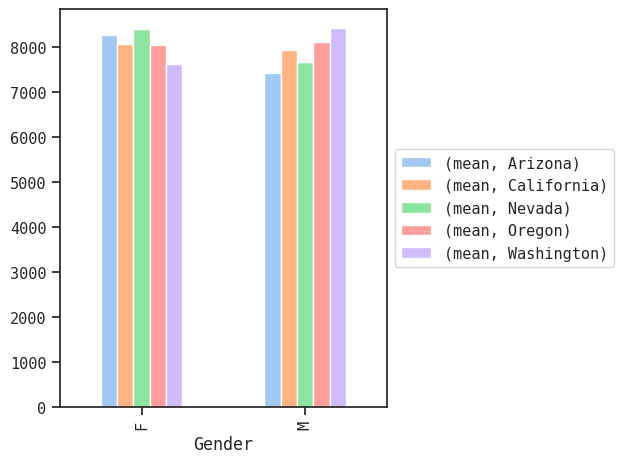

In [142]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='State', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [143]:
# Average CLV for female in Nevada is more than any other state while it is lowest in washington
# Average CLV for male in Washington is more than any other state while it is lowest in Arizonal 

                    sum                                                    \
State           Arizona       California          Nevada           Oregon   
Gender                                                                      
F       7242911.7069990 12767302.1514290 3828775.1517820 10728449.2755480   
M       6144952.8494660 12444188.2874100 3277240.2805980 10282171.7216600   
All    13387864.5564650 25211490.4388390 7106015.4323800 21010620.9972080   

                                         
State       Washington              All  
Gender                                   
F      3146535.5525770 37713973.8383350  
M      3254599.3210630 35403152.4601970  
All    6401134.8736400 73117126.2985320  


<Figure size 2000x1000 with 0 Axes>

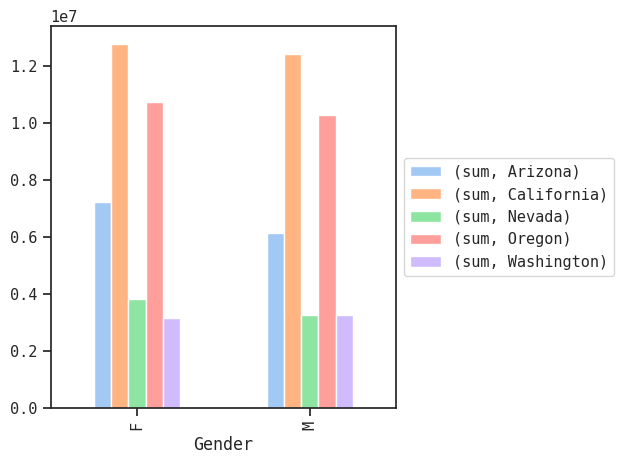

In [144]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='State', aggfunction='sum',margin_pivot=True,
                           print_values=True, margin_plot=False)

In [145]:
# Total CLV is highest for California for both male and female customer
# Total CLV is lowest for Nevada for both male and female

         count                                          
State  Arizona California Nevada Oregon Washington   All
Gender                                                  
F          875       1582    455   1334        412  4658
M          828       1568    427   1267        386  4476
All       1703       3150    882   2601        798  9134


<Figure size 2000x1000 with 0 Axes>

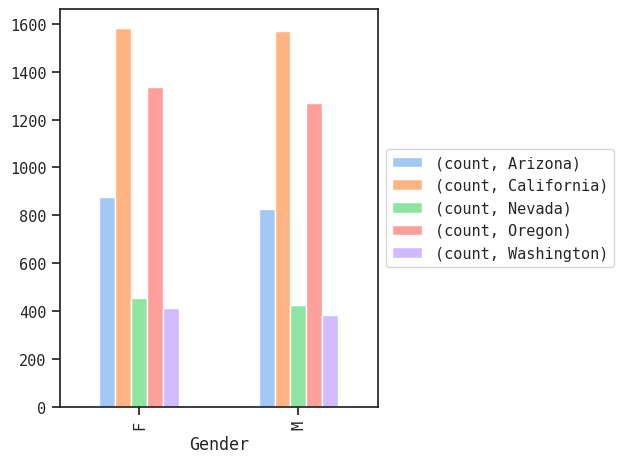

In [146]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='State', aggfunction='count',margin_pivot=True,
                           print_values=True, margin_plot=False)

In [147]:
# Number of customer for Neveda state was less for both male and female

                 mean             
Response           No          Yes
Gender                            
F        8092.2264383 8123.1099059
M        7965.0557099 7581.6654362


<Figure size 2000x1000 with 0 Axes>

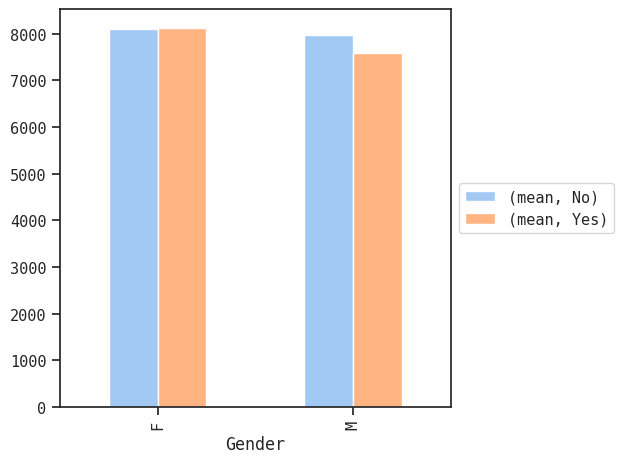

In [148]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Response', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [149]:
# Average CLV is same for female is same for both who responded yes or no
# Average CLV is less for male who responded yes as compared to those who responded no

                 mean                           
Coverage        Basic     Extended       Premium
Gender                                          
F        7240.4599619 8706.5712876 11683.8480027
M        7140.3415265 8880.5236011 10055.9938322


<Figure size 2000x1000 with 0 Axes>

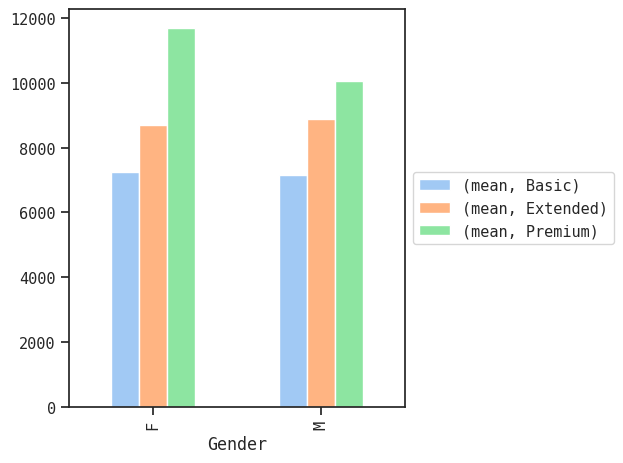

In [150]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Coverage', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [151]:
# Average CLV is greater for both male and female having premuim coverage

                  mean                                                 \
Education     Bachelor      College       Doctor High School or Below   
Gender                                                                  
F         8012.8779213 7732.8333389 7423.6303797         8578.9958397   
M         7722.0720989 7971.3420893 7614.8231222         8010.0826898   

                        
Education       Master  
Gender                  
F         8319.1115617  
M         8158.0784853  


<Figure size 2000x1000 with 0 Axes>

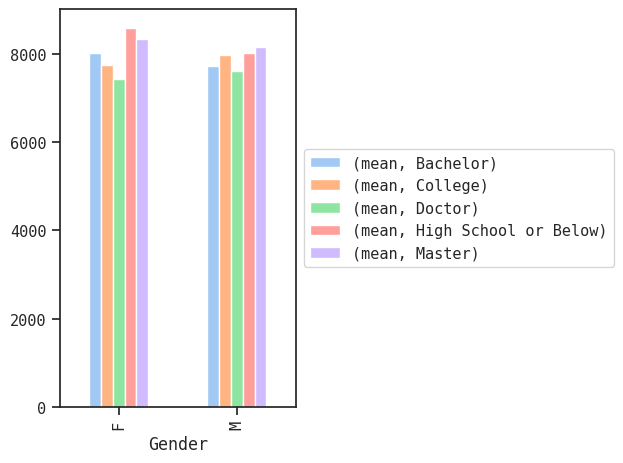

In [152]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Education', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [153]:
# Average CLV for customer having Education as Doctor is lowest in both gender
# Average CLV for male customer is more for customer having Master degree as Education
# Average CLV for Female Customer is more for customer having high School or Below degree as Education

In [154]:
auto_insurance_df_copy.head(1)

State          CLV Response Coverage Education EmploymentStatus  \
0  Washington 2763.5192790       No    Basic  Bachelor         Employed   

  Gender  Income Location Code Marital Status  Monthly Premium Auto  \
0      F   56274      Suburban        Married                    69   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   

   Number of Open Complaints  Number of Policies     Policy Type  \
0                          0                   1  Corporate Auto   

         Policy Renew Offer Type Sales Channel  Total Claim Amount  \
0  Corporate L3           Offer1         Agent         384.8111470   

  Vehicle Class Vehicle Size  Effective Month  
0  Two-Door Car      Medsize                2

                         mean                                          \
EmploymentStatus     Disabled     Employed Medical Leave      Retired   
Gender                                                                  
F                7849.2541924 8440.1698419  6921.1035337 7527.7970614   
M                7845.8209041 7983.9746963  8349.3171410 7454.6749734   

                               
EmploymentStatus   Unemployed  
Gender                         
F                7546.5222992  
M                7722.5465952  


<Figure size 2000x1000 with 0 Axes>

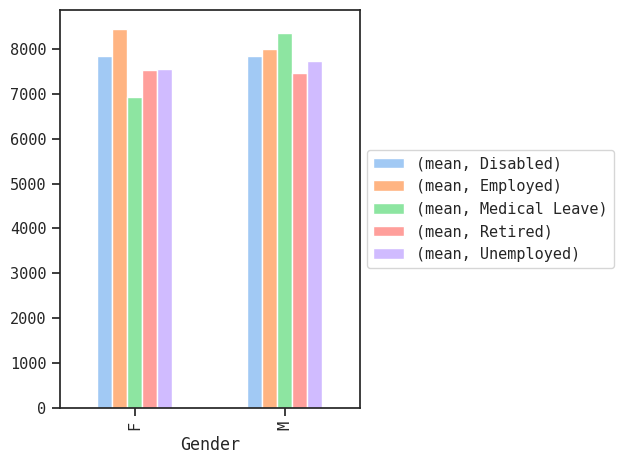

In [155]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='EmploymentStatus', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [156]:
# Average CLV is highest of employed Female customers and lowest average CLV is female customer on medical leave

# Averge CLV is highest for male customer on medical leave and lowest for male customer who has been retired.

                       mean                          
Marital Status     Divorced      Married       Single
Gender                                               
F              8309.0861612 8094.6480471 7972.4827582
M              8168.3549810 8061.6673589 7482.4195033


<Figure size 2000x1000 with 0 Axes>

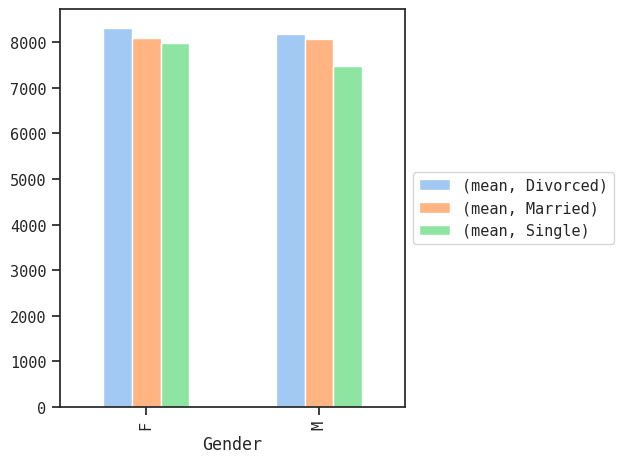

In [157]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Marital Status', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [158]:
# Average CLV is more in case customer who is divorced for both gender.

                      mean                          
Location Code        Rural     Suburban        Urban
Gender                                              
F             8079.9480464 8048.4873280 8262.8896702
M             7788.8696553 7964.3163497 7803.1920615


<Figure size 2000x1000 with 0 Axes>

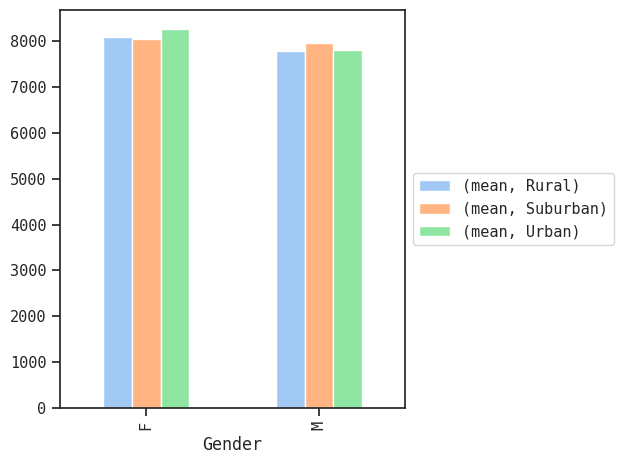

In [159]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Location Code', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [160]:
# Average CLV is slightly higher for female customer who lives in Urban area.
# Average CLV is slightly higher for male customer who lives in sub-urban area.

                      mean                           
Policy Type Corporate Auto Personal Auto Special Auto
Gender                                               
F             7942.2967430  8132.5800415 8251.4278815
M             7680.9447271  7918.3599916 8975.3657881


<Figure size 2000x1000 with 0 Axes>

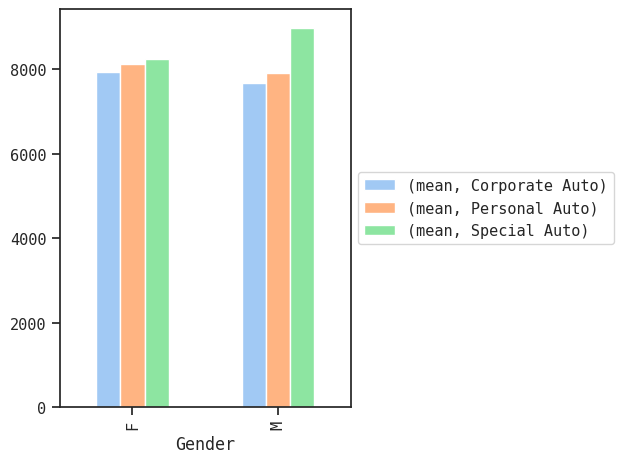

In [161]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Policy Type', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [162]:
# Average CLV for customer having policy type as special Auto but in case of male customer is higher significantly as compare
# to female.

               mean                                                      \
Policy Corporate L1 Corporate L2 Corporate L3  Personal L1  Personal L2   
Gender                                                                    
F      8717.7148820 7708.1554881 7807.5237954 7718.0307203 8047.5254680   
M      8225.2831688 7482.3004476 7603.0812547 8270.4025429 8062.3631373   

                                                            
Policy  Personal L3   Special L1   Special L2   Special L3  
Gender                                                      
F      8332.7132881 7669.2140963 8036.2471882 8824.6946251  
M      7698.4479543 9233.2941437 8671.8219133 9179.8894282  


<Figure size 2000x1000 with 0 Axes>

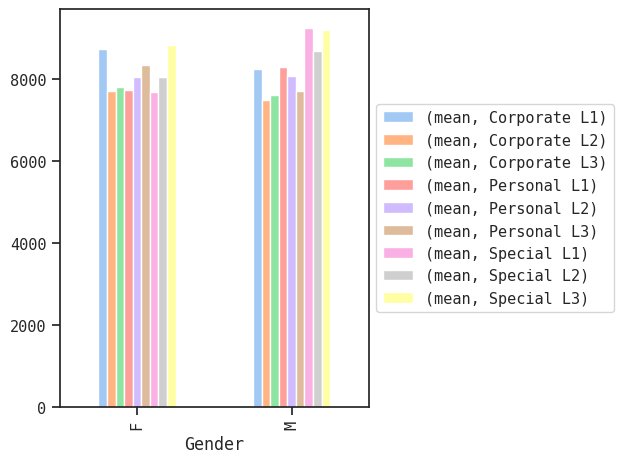

In [163]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Policy', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [164]:
# For Female customer average CLV is highest for Corporate L1 and special L1 
# For Male customer average CLV is highest for special L1 and special L3

                         mean                                       
Renew Offer Type       Offer1       Offer2       Offer3       Offer4
Gender                                                              
F                8711.6343848 7664.4473318 7877.2972118 7150.3257982
M                8701.8761773 7128.6941193 8121.8919480 7204.5876715


<Figure size 2000x1000 with 0 Axes>

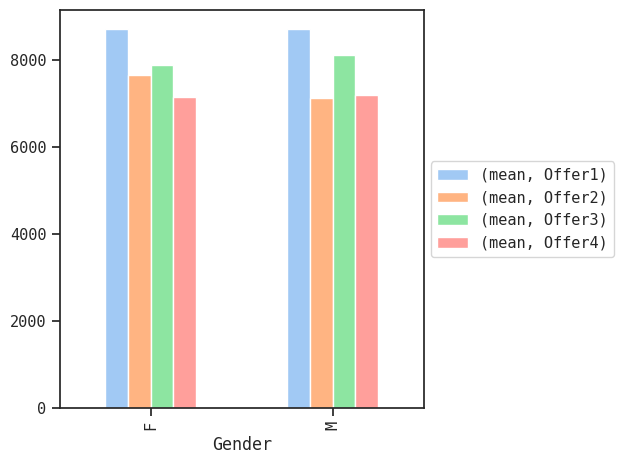

In [165]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Renew Offer Type', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [166]:
# For Female customer average CLV is highest for offer1 and offer3 
# For Male customer average CLV is highest for special offer1 and offer2

                      mean                                       
Sales Channel        Agent       Branch  Call Center          Web
Gender                                                           
F             7979.7355515 8203.3234685 8345.2630983 7875.1334139
M             7935.3898127 8034.9854315 7843.2468408 7668.7076009


<Figure size 2000x1000 with 0 Axes>

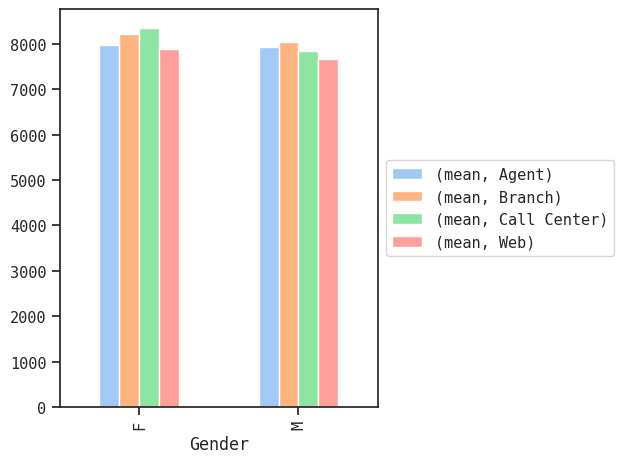

In [167]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Sales Channel', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [168]:
# For Female customer average CLV is highest for customer reach from call center 
# For Male customer average CLV is highest for customer  reach from call branch 

                       mean                                            \
Vehicle Class Four-Door Car    Luxury Car    Luxury SUV           SUV   
Gender                                                                  
F              6747.7182434 15095.1699763 18636.9504051 10435.4740142   
M              6505.7329831 18722.2504629 15878.8609600 10451.9910527   

                                          
Vehicle Class    Sports Car Two-Door Car  
Gender                                    
F             11272.4039600 6936.0541006  
M             10229.5747027 6413.2151118  


<Figure size 2000x1000 with 0 Axes>

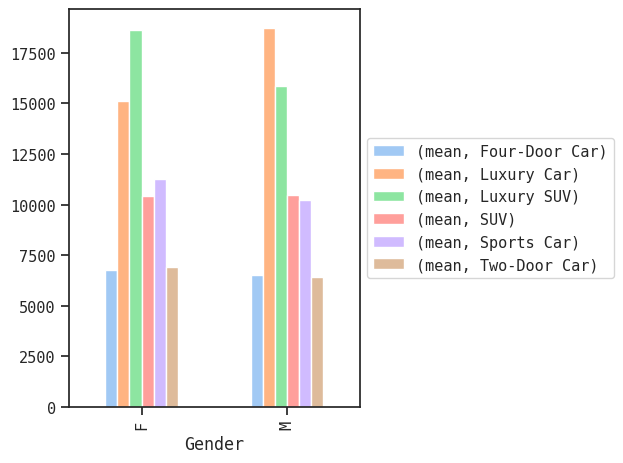

In [169]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Vehicle Class', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [170]:
# For Female customer average CLV is highest for customer having Luxury SUV
# For Male customer average CLV is highest for customer  havinf Luxury Car 

                     mean                          
Vehicle Size        Large      Medsize        Small
Gender                                             
F            7789.2891831 8193.1892687 7926.7404801
M            7265.2492589 7906.5277946 8258.8915113


<Figure size 2000x1000 with 0 Axes>

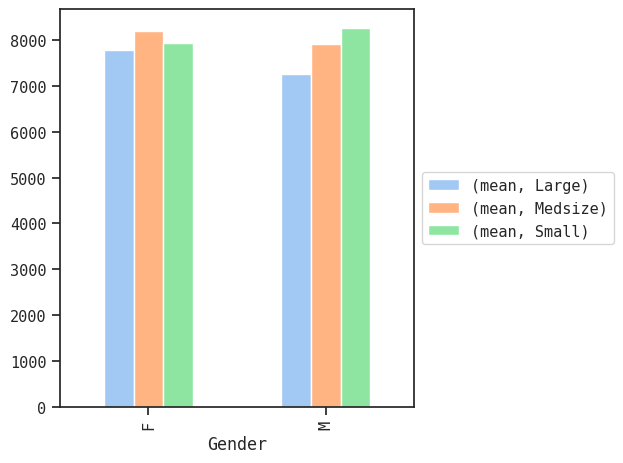

In [171]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Vehicle Size', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [172]:
# For female having medium size vehicle have slighly higher average CLV
# For male having small size vechnicle have slightly higher average CLV

                        mean                                         \
Effective Month           1            2            3            4    
Gender                                                                
F               8386.4854006 8074.7958626 6971.7852557 7154.4293081   
M               7976.1655228 7793.1416892 7691.0357578 8282.9991505   

                                                                     \
Effective Month           5            6            7            8    
Gender                                                                
F               7388.1146844 8292.2744542 7912.4019264 7581.6754531   
M               8305.9522588 8343.1410434 7675.3006598 8383.5652804   

                                                                     
Effective Month           9            10           11           12  
Gender                                                               
F               8520.5635337 7686.6340076 8814.5949061 7822.6800556  
M       

<Figure size 2000x1000 with 0 Axes>

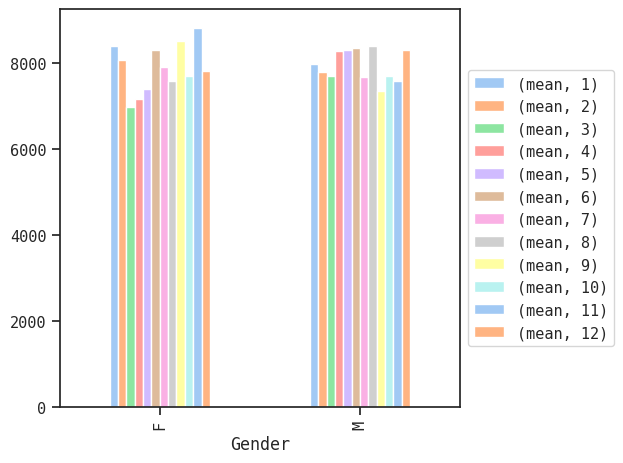

In [173]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='Gender', columns='Effective Month', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [174]:
# For Female customers highest average CLV is for November Month.
# For Male customers highest average CLV for Average Month which is slighly higher than other month.

In [175]:
auto_insurance_df_copy.head(1)

State          CLV Response Coverage Education EmploymentStatus  \
0  Washington 2763.5192790       No    Basic  Bachelor         Employed   

  Gender  Income Location Code Marital Status  Monthly Premium Auto  \
0      F   56274      Suburban        Married                    69   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   

   Number of Open Complaints  Number of Policies     Policy Type  \
0                          0                   1  Corporate Auto   

         Policy Renew Offer Type Sales Channel  Total Claim Amount  \
0  Corporate L3           Offer1         Agent         384.8111470   

  Vehicle Class Vehicle Size  Effective Month  
0  Two-Door Car      Medsize                2

                   mean             
Response             No          Yes
State                               
Arizona    7836.3426928 8011.5400204
California 8016.5610196 7927.3575700
Nevada     8249.5594704 6877.8173695
Oregon     8088.3938124 8015.8105441
Washington 8063.0428568 7758.7004155


<Figure size 2000x1000 with 0 Axes>

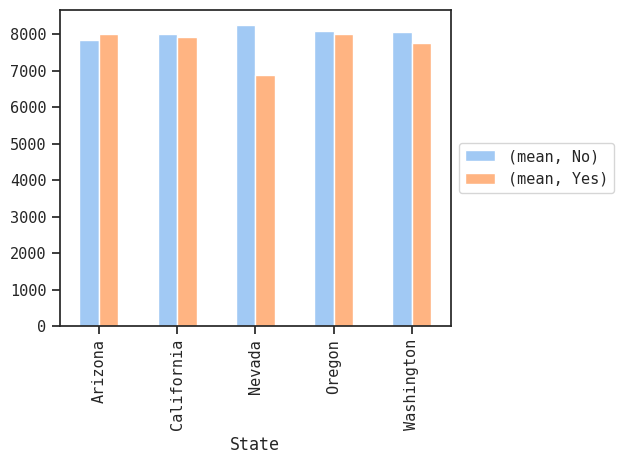

In [176]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='State', columns='Response', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [177]:
# For Nevada average CLV for customer having response yes is less than as customer who has responsed as No.

                   mean                           
Coverage          Basic     Extended       Premium
State                                             
Arizona    7081.3209657 8783.7746175 10241.1558858
California 7175.5469218 8827.6440125 10848.3171516
Nevada     7400.4632991 8853.5725109  9430.2933948
Oregon     7251.6461406 8667.4336220 11731.6655491
Washington 7063.0876418 8973.7643954 11448.9473419


<Figure size 2000x1000 with 0 Axes>

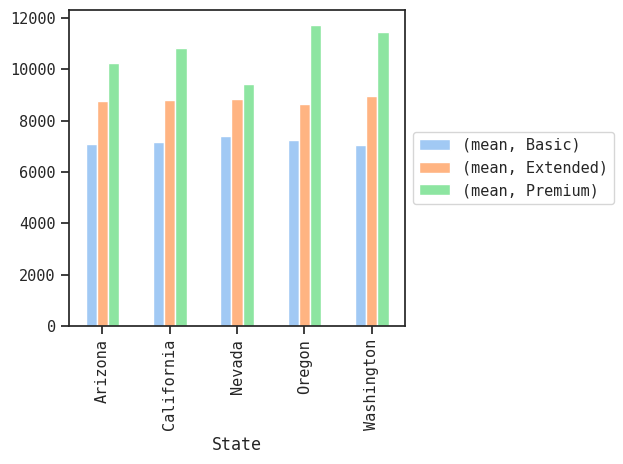

In [178]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='State', columns='Coverage', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [179]:
# The difference between average CLV is more for customer living in Washington between all the coverage.
# The difference between average CLV is less for customer living in Nevada between all the coverage.

                       mean                          
Marital Status     Divorced      Married       Single
State                                                
Arizona        7553.0564176 8050.7401346 7599.1583718
California     8584.6293314 7899.6137112 7910.3321517
Nevada         8776.5671447 7898.1792835 7979.6215043
Oregon         8222.1672495 8387.8107126 7332.8471861
Washington     7872.3346557 8035.0853912 8066.0299871


<Figure size 2000x1000 with 0 Axes>

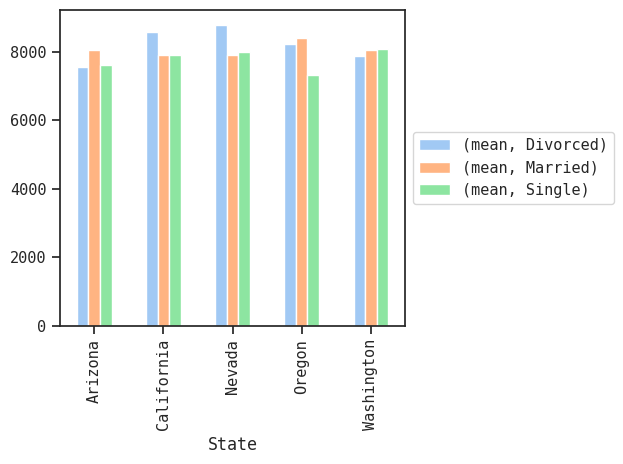

In [180]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='State', columns='Marital Status', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [181]:
# For Nevada is average CLV for customer who are divorced as compared to other customers
# For Oregon average CLV for customer who are married as compared to other customers
# For washington average CLV for customer who are married as compared to customer having other matial status.

                     mean                          
Vehicle Size        Large      Medsize        Small
State                                              
Arizona      7678.6092530 7964.3502055 7568.0083169
California   7516.9932965 7953.7168052 8461.6055616
Nevada       6733.9671588 8470.1344861 7465.2049383
Oregon       7618.4358227 8075.1519643 8319.4265965
Washington   8069.0814237 8102.1978023 7665.0545626


<Figure size 2000x1000 with 0 Axes>

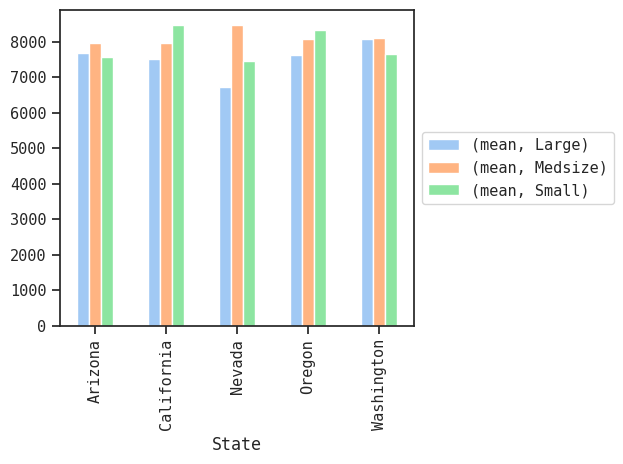

In [182]:
plot_pivot_table_bar_chart(data=auto_insurance_df_copy, index='State', columns='Vehicle Size', aggfunction='mean',margin_pivot=False,
                           print_values=True, margin_plot=False)

In [183]:
# For Nevada state customer having medium size vehicle average CLV is highest.
# For Oregon state customer having small size vehicle average CLV is highest.

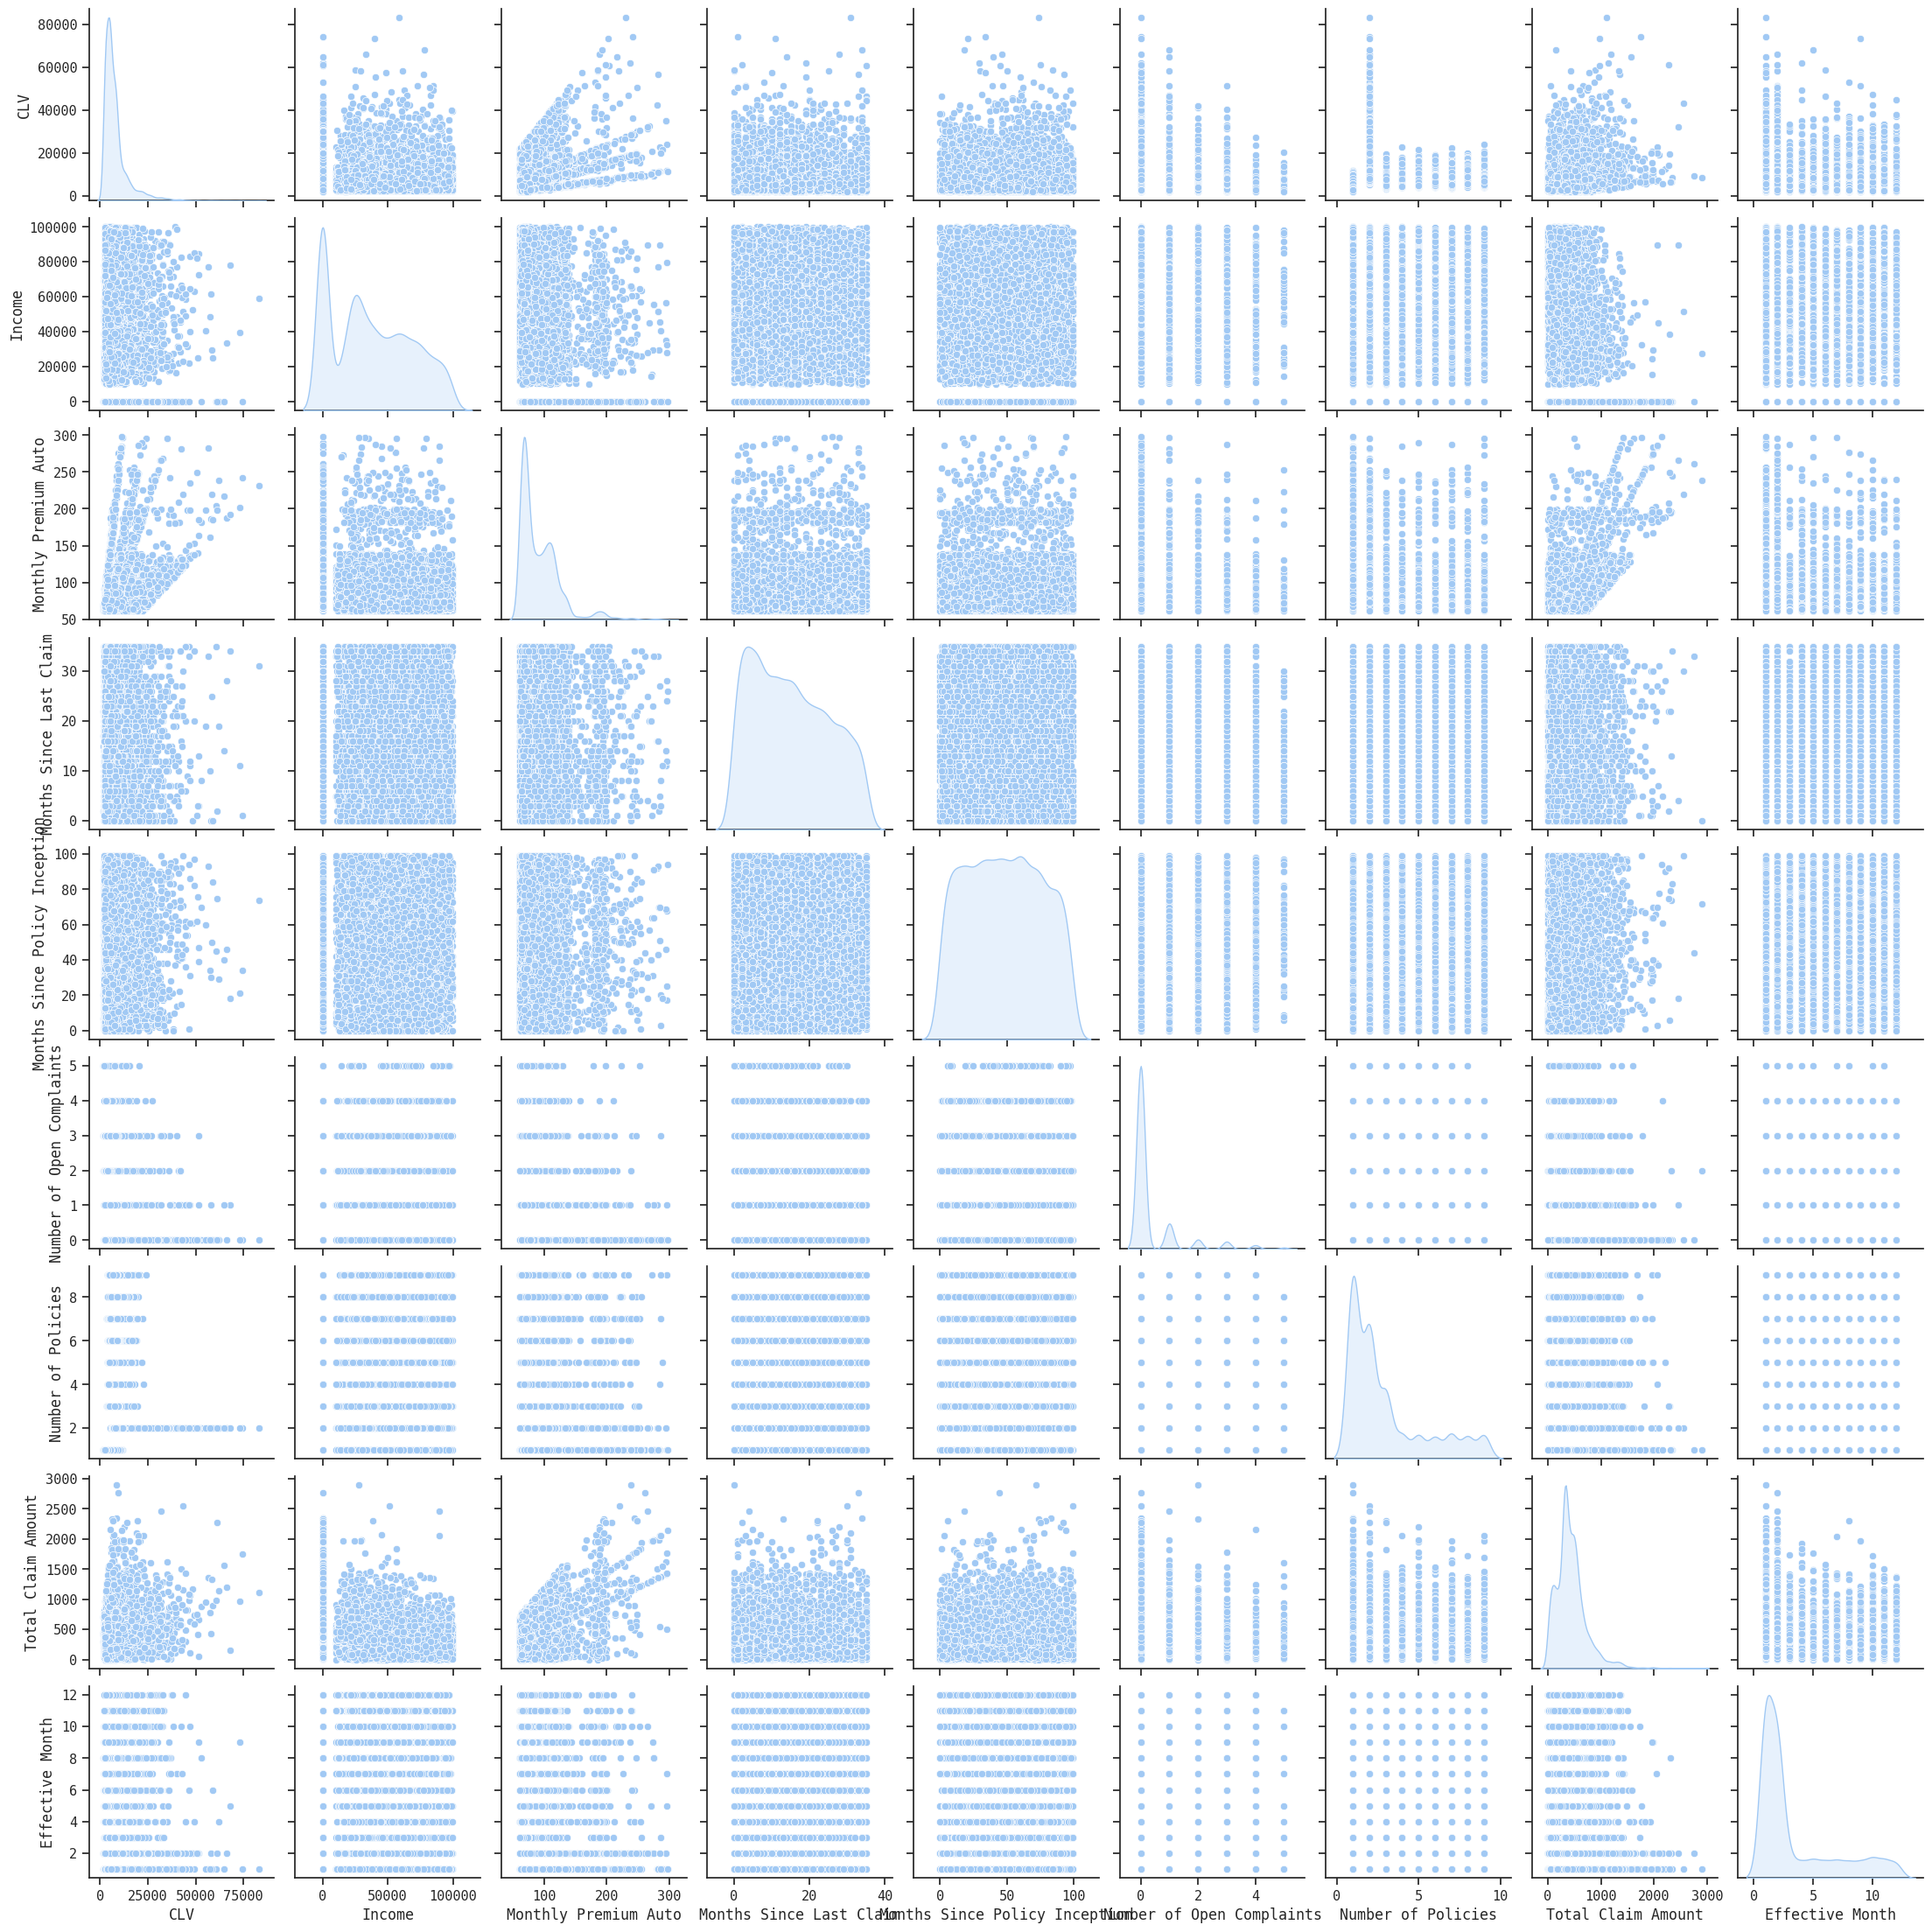

In [184]:
sns.pairplot(auto_insurance_df_copy_num,diag_kind='kde',  kind='scatter')
plt.show()

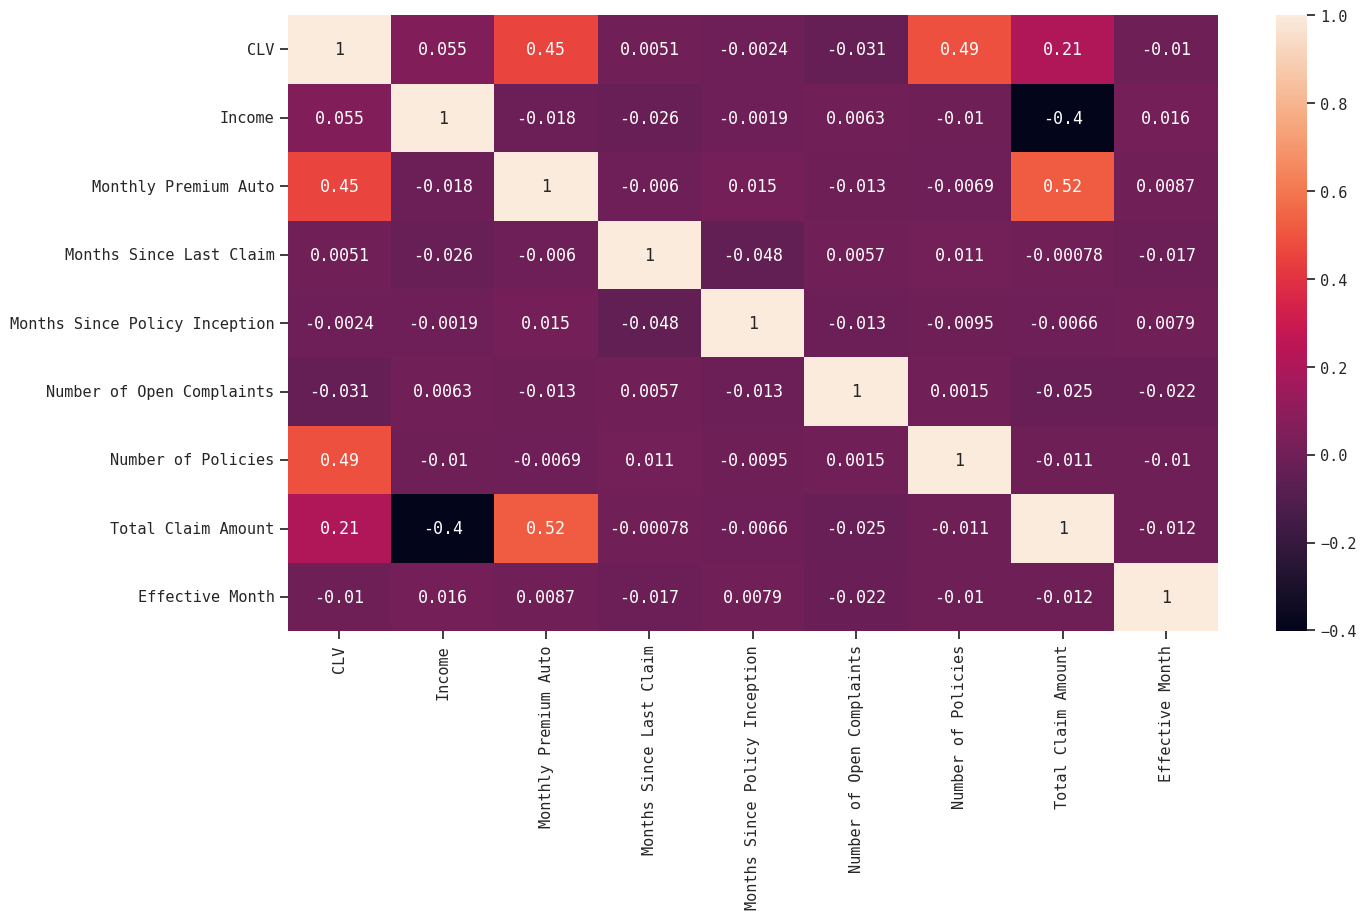

In [185]:
plt.figure(figsize=(15,8))
sns.heatmap(auto_insurance_df_copy_num.corr(method='spearman'), annot=True,fmt='.2g')
plt.show()

In [186]:
# Number of policies, Monthly Premuim Auto and Total claim amount has moderately correlation.
# Income and Total claim amount and Income has moderately low correlation.
# CLV and Monthly Premuim Auto has moderately low correlation.
# Total claim amount and CLV has moderately low correlation.

# Statistical Significance

In [187]:
stats.shapiro(auto_insurance_df_copy['CLV'])

ShapiroResult(statistic=0.7033723183514178, pvalue=4.0169007188037684e-83)

In [188]:
stats.jarque_bera(auto_insurance_df_copy['CLV'])

SignificanceResult(statistic=86632.04128437076, pvalue=0.0)

In [189]:
# p-value less than 0.05 we reject null hypothesis the data is not normally distributed

# We will proceed with non parametric tests since the dependent variable is not normally distributed

In [190]:
columns_cat = list(auto_insurance_df_copy_cat.columns)
columns_cat

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [191]:
manwhiteneyy = []

annova = []


for i in columns_cat:
    if (auto_insurance_df_copy_cat[i].nunique()>2):
        annova.append(i)
    else:
        manwhiteneyy.append(i)

print("Annova:", annova)
print("manwhiteneyy:",manwhiteneyy)

Annova: ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
manwhiteneyy: ['Response', 'Gender']


In [192]:
# H0, the distributions of both populations are equal The alternative hypothesis H1 is that the distributions are not equal.

In [193]:
yes=auto_insurance_df_copy[auto_insurance_df_copy['Response']=='No']['CLV']
no=auto_insurance_df_copy[auto_insurance_df_copy['Response']=='Yes']['CLV']

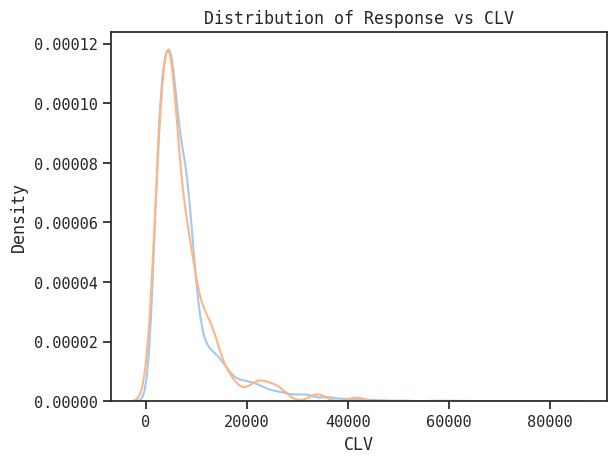

In [194]:
sns.distplot(yes, hist=False)
sns.distplot(no,hist=False)
plt.title('Distribution of Response vs CLV')
plt.show()

In [195]:
# If the distributions are identical, which is the null hypothesis of the Mann-Whitney U test, the mean rank will be the same

In [196]:
f = stats.mannwhitneyu(yes, no)
print(f)

MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)


In [197]:
# p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

In [198]:
# For Gender

In [199]:
male=auto_insurance_df_copy[auto_insurance_df_copy['Gender']=='M']['CLV']
female=auto_insurance_df_copy[auto_insurance_df_copy['Gender']=='F']['CLV']

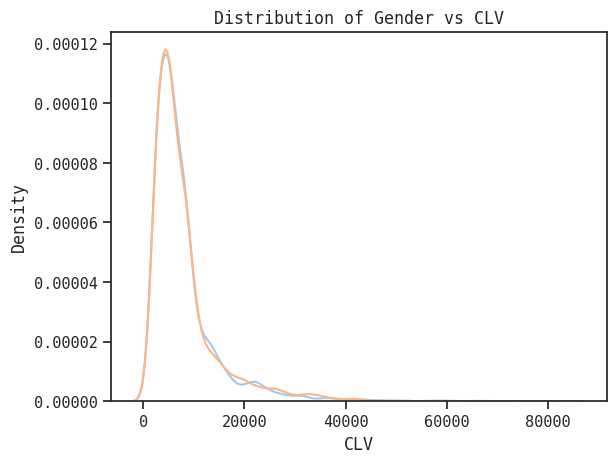

In [200]:
sns.distplot(male, hist=False)
sns.distplot(female,hist=False)
plt.title('Distribution of Gender vs CLV')
plt.show()

In [201]:
f = stats.mannwhitneyu(male, female)
print(f)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


In [202]:
# p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

In [203]:
# we test above two features with non-Paramteric unpaired ttest and we concluded that those 2 features 
# is not significant to predict target

#H0:the mean ranks of the groups are the same.
#H1:the mean ranks of the groups are not the same.

In [204]:
# for State

In [205]:
ca=auto_insurance_df_copy[auto_insurance_df_copy['State']=='California']['CLV']
Or=auto_insurance_df_copy[auto_insurance_df_copy['State']=='Oregon']['CLV']
Ar=auto_insurance_df_copy[auto_insurance_df_copy['State']=='Arizona']['CLV']
Ne=auto_insurance_df_copy[auto_insurance_df_copy['State']=='Nevada']['CLV']
Wa=auto_insurance_df_copy[auto_insurance_df_copy['State']=='Washington']['CLV']

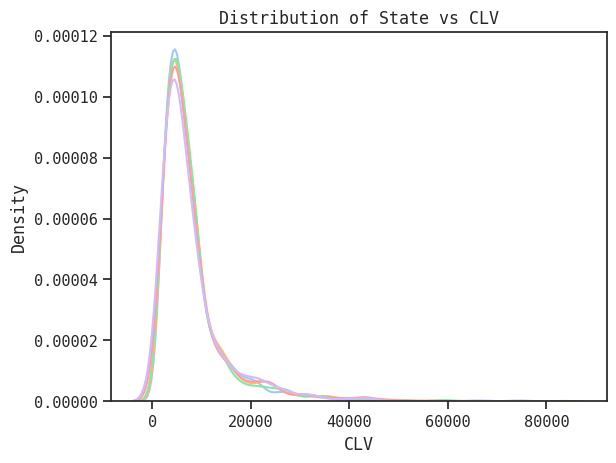

In [206]:
sns.distplot(ca, hist=False)
sns.distplot(Or,hist=False)
sns.distplot(Ar, hist=False)
sns.distplot(Ne,hist=False)
sns.distplot(Wa, hist=False)

plt.title('Distribution of State vs CLV')
plt.show()

In [207]:
a = stats.kruskal(ca,Or,Ar,Ne,Wa)
print(a)

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)


In [208]:
# p-value > 0.05 failed to reject H0

In [209]:
b=stats.f_oneway(ca,Or,Ar,Ne,Wa)
print(b)

F_onewayResult(statistic=0.272892854621193, pvalue=0.8955985932127517)


In [210]:
# p-value > 0.05 failed to reject H0 which is is not significant.

In [211]:
# for Coverage

In [212]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Coverage']=='Basic']['CLV']
Ex=auto_insurance_df_copy[auto_insurance_df_copy['Coverage']=='Extended']['CLV']
Pr=auto_insurance_df_copy[auto_insurance_df_copy['Coverage']=='Premium']['CLV']

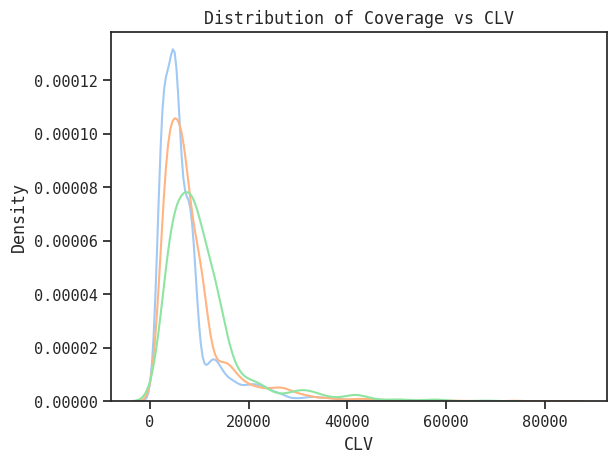

In [213]:
sns.distplot(Ba,hist=False,label='Basic')
sns.distplot(Ex,hist=False)
sns.distplot(Pr,hist=False)
plt.title('Distribution of Coverage vs CLV')
plt.show()

In [214]:
c =stats.kruskal(Ba,Ex,Pr)
print(c)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)


In [215]:
# p-value < 0.05 to reject H0  it is singificant features

In [216]:
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

In [217]:
# p-value < 0.05 to reject H0

In [218]:
# for Education

In [219]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Education']=='Bachelor']['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Education']=='College']['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Education']=='High School or Below']['CLV']
Ma=auto_insurance_df_copy[auto_insurance_df_copy['Education']=='Master']['CLV']
Da=auto_insurance_df_copy[auto_insurance_df_copy['Education']=='Doctor']['CLV']

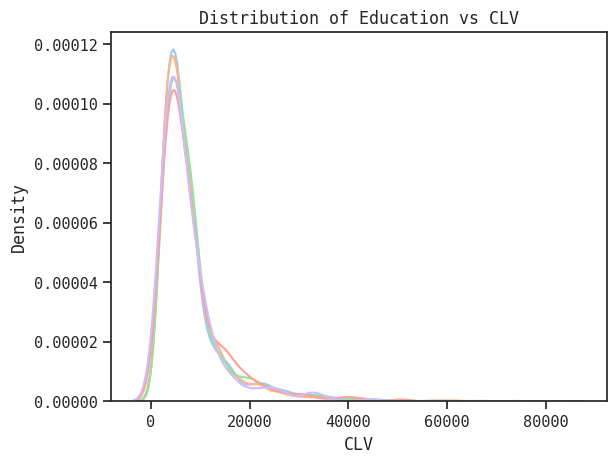

In [220]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)
sns.distplot(Ma,hist=False)
sns.distplot(Da, hist=False)

plt.title('Distribution of Education vs CLV')
plt.show()

In [221]:
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)


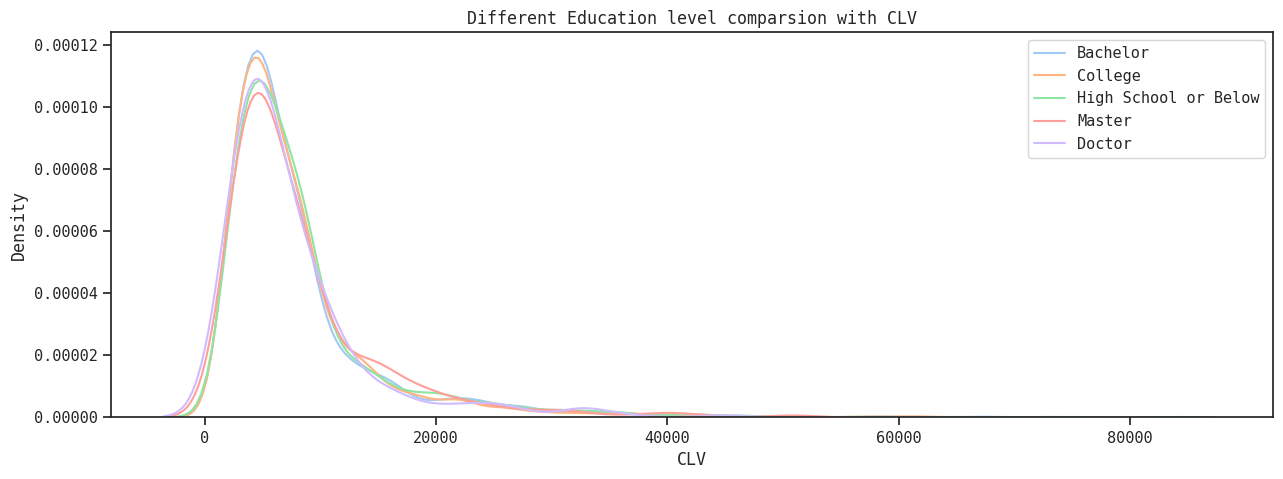

In [222]:
plt.figure(figsize=(15,5))
sns.distplot(Ba,hist=False,label='Bachelor')
sns.distplot(Co,hist=False,label='College')
sns.distplot(Hi,hist=False,label='High School or Below')
sns.distplot(Ma,hist=False,label='Master')
sns.distplot(Da,hist=False,label='Doctor')
plt.title("Different Education level comparsion with CLV")
# plt.savefig("Education.png")

plt.legend()
plt.show()

In [223]:
# for EmploymentStatus 

In [224]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['EmploymentStatus']=='Employed']['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['EmploymentStatus']=='Unemployed']['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['EmploymentStatus']=='Medical Leave']['CLV']
Ma=auto_insurance_df_copy[auto_insurance_df_copy['EmploymentStatus']=='Disabled']['CLV']
Da=auto_insurance_df_copy[auto_insurance_df_copy['EmploymentStatus']=='Retired']['CLV']

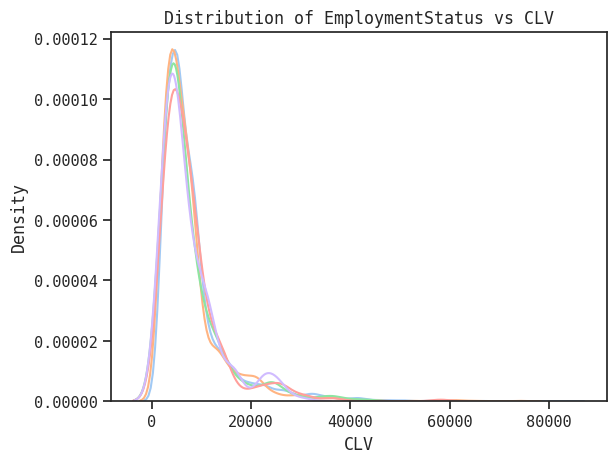

In [225]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)
sns.distplot(Ma,hist=False)
sns.distplot(Da, hist=False)

plt.title('Distribution of EmploymentStatus vs CLV')
plt.show()

In [226]:
e = stats.kruskal(Ba,Co,Hi,Ma,Da)
print(e)

KruskalResult(statistic=42.56159302970864, pvalue=1.2758458797542519e-08)


In [227]:
# p-value < 0.05 reject H0, EmploymentStatus is significant in predicting CLV

In [228]:
# for Location Code 

In [229]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Location Code']=='Suburban']['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Location Code']=='Rural']['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Location Code']=='Urban']['CLV']

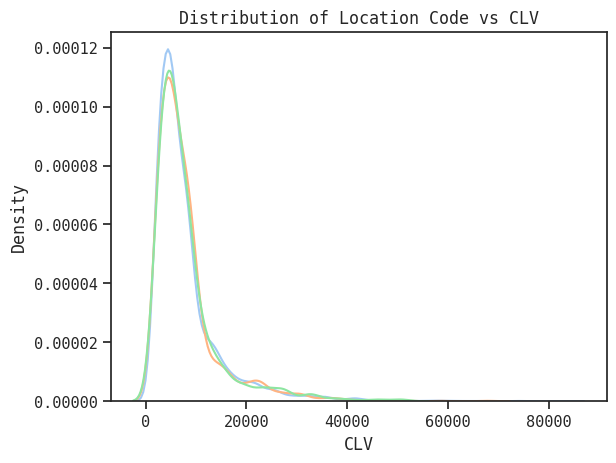

In [230]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)

plt.title('Distribution of Location Code vs CLV')
plt.show()

In [231]:
g = stats.kruskal(Ba,Co,Hi)
print(g)

KruskalResult(statistic=2.4638212999332567, pvalue=0.29173464205664124)


In [232]:
# p-value < 0.05 reject H0, Location Code can be significant in predicting CLV

In [233]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Marital Status']=='Married']['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Marital Status']=='Single']['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Marital Status']=='Divorced']['CLV']

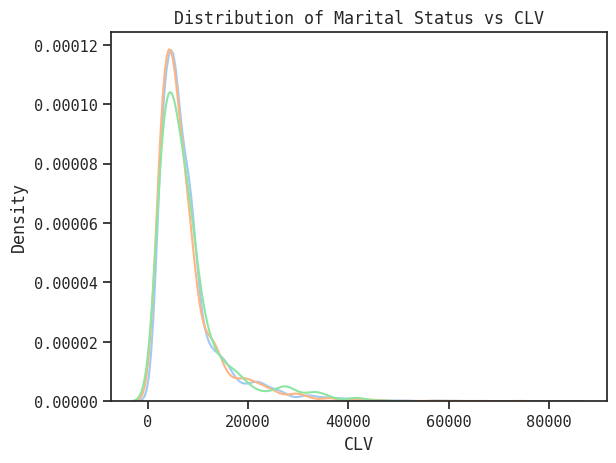

In [234]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)

plt.title('Distribution of Marital Status vs CLV')
plt.show()

In [235]:
h = stats.kruskal(Ba,Co,Hi)
print(h)

KruskalResult(statistic=20.895798766808223, pvalue=2.9009146434700455e-05)


In [236]:
# p-value < 0.05 reject H0, Marital Status can be significant in predicting CLV

In [237]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Number of Open Complaints']==0]['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Number of Open Complaints']==1]['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Number of Open Complaints']==2]['CLV']
Ma=auto_insurance_df_copy[auto_insurance_df_copy['Number of Open Complaints']==3]['CLV']
Da=auto_insurance_df_copy[auto_insurance_df_copy['Number of Open Complaints']==4]['CLV']
As=auto_insurance_df_copy[auto_insurance_df_copy['Number of Open Complaints']==5]['CLV']

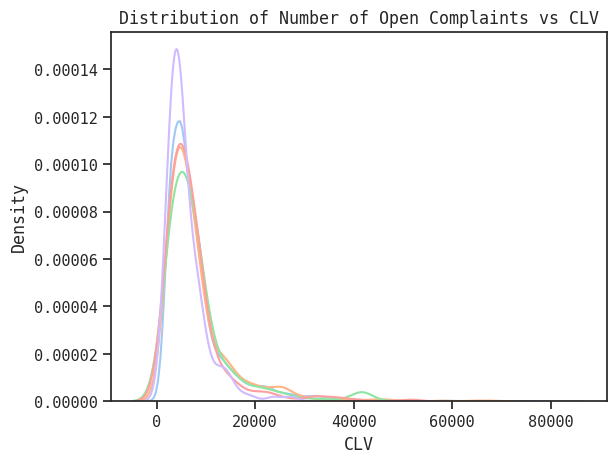

In [238]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)
sns.distplot(Ma,hist=False)
sns.distplot(Da, hist=False)

plt.title('Distribution of Number of Open Complaints vs CLV')
plt.show()

In [239]:
o = stats.kruskal(Ba,Co,Hi,Ma,Da,As)
print(o)

KruskalResult(statistic=29.160617988301833, pvalue=2.1564409504417123e-05)


In [240]:
# p-value < 0.05 reject H0, Number of Open Complaints can be significant in predicting CLV

In [241]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Number of Policies']==1]['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Number of Policies']==2]['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Number of Policies']==3]['CLV']

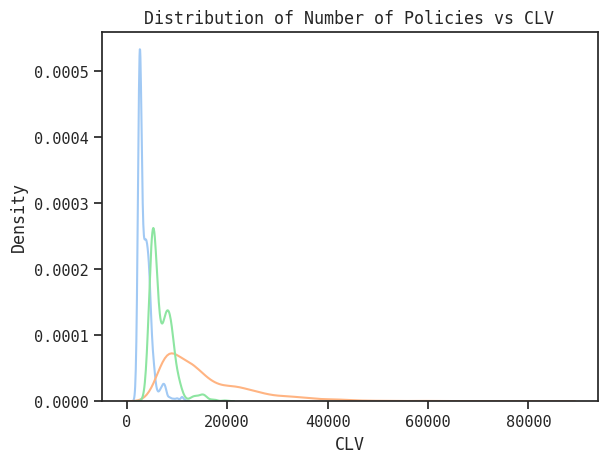

In [242]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)


plt.title('Distribution of Number of Policies vs CLV')
plt.show()

In [243]:
p = stats.kruskal(Ba,Co,Hi)
print(p)

KruskalResult(statistic=5017.7060662040785, pvalue=0.0)


In [244]:
#p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV

In [245]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Policy Type']=='Personal Auto']['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Policy Type']=='Corporate Auto']['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Policy Type']=='Special Auto']['CLV']

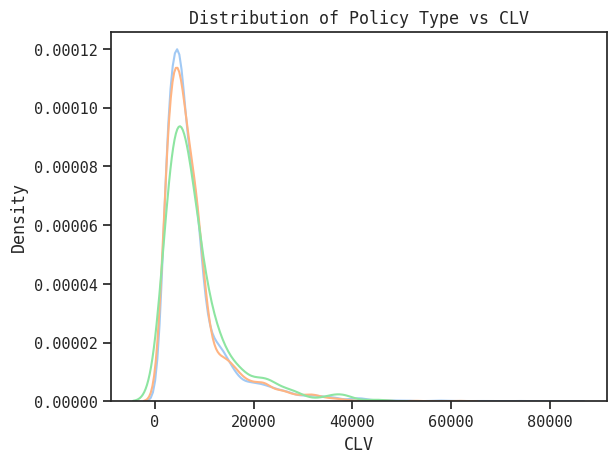

In [246]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)


plt.title('Distribution of Policy Type vs CLV')
plt.show()

In [247]:
i = stats.kruskal(Ba,Co,Hi)
print(i)

KruskalResult(statistic=4.6074986354931795, pvalue=0.0998836452694168)


In [248]:
#p-value > 0.05 failed to reject H0, Policy Type may not be significant in predicting CLV

In [249]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Policy']=='Personal L3']['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Policy']=='Personal L2']['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Policy']=='Personal L1']['CLV']
Ma=auto_insurance_df_copy[auto_insurance_df_copy['Policy']=='Corporate L3']['CLV']
Da=auto_insurance_df_copy[auto_insurance_df_copy['Policy']=='Corporate L2']['CLV']
Ca=auto_insurance_df_copy[auto_insurance_df_copy['Policy']=='Corporate L1']['CLV']
s1=auto_insurance_df_copy[auto_insurance_df_copy['Policy']=='Special L2']['CLV']
s2=auto_insurance_df_copy[auto_insurance_df_copy['Policy']=='Special L3']['CLV']
s3=auto_insurance_df_copy[auto_insurance_df_copy['Policy']=='Special L1']['CLV']

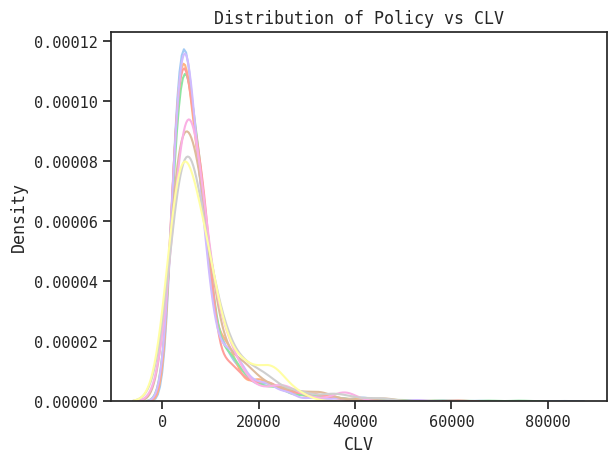

In [250]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)
sns.distplot(Ma, hist=False)
sns.distplot(Da,hist=False)
sns.distplot(Ca, hist=False)
sns.distplot(s1, hist=False)
sns.distplot(s2,hist=False)
sns.distplot(s3, hist=False)

plt.title('Distribution of Policy vs CLV')
plt.show()

In [251]:
j =stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)
print(j)

KruskalResult(statistic=7.944351884462466, pvalue=0.4389248352544014)


In [252]:
# p-value > 0.05 failed to reject H0, Policy may not be significant in predicting CLV

In [253]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Renew Offer Type']=='Offer1']['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Renew Offer Type']=='Offer2']['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Renew Offer Type']=='Offer3']['CLV']
Ma=auto_insurance_df_copy[auto_insurance_df_copy['Renew Offer Type']=='Offer4']['CLV']

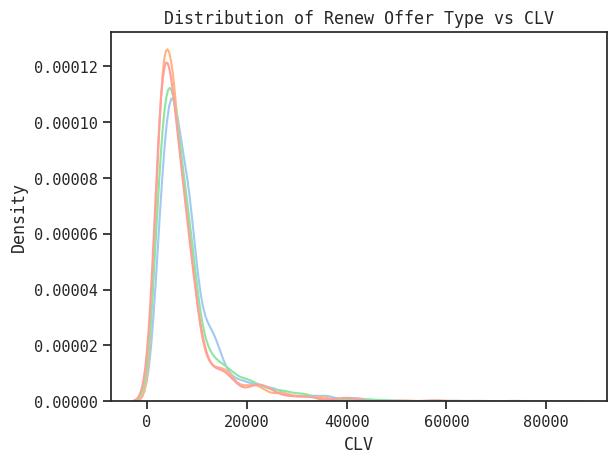

In [254]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)
sns.distplot(Ma, hist=False)

plt.title('Distribution of Renew Offer Type vs CLV')
plt.show()

In [255]:
k =stats.kruskal(Ba,Co,Hi,Ma)
print(k)

KruskalResult(statistic=168.90219457792458, pvalue=2.196144881912684e-36)


In [256]:
# p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV

In [257]:
#For Sales Channel

In [258]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Sales Channel']=='Agent']['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Sales Channel']=='Branch']['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Sales Channel']=='Call Center']['CLV']
Ma=auto_insurance_df_copy[auto_insurance_df_copy['Sales Channel']=='Web']['CLV']

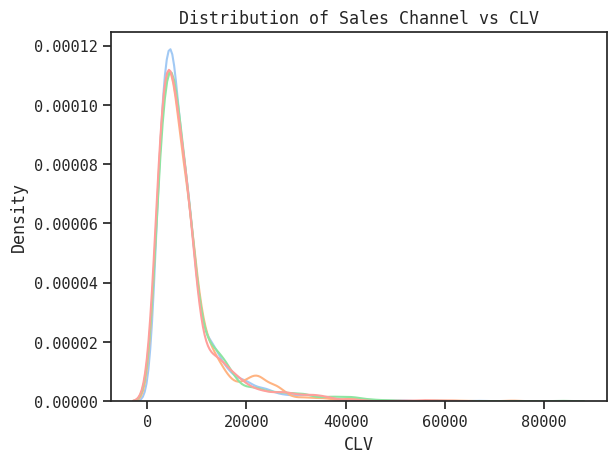

In [259]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)
sns.distplot(Ma, hist=False)

plt.title('Distribution of Sales Channel vs CLV')
plt.show()

In [260]:
l = stats.kruskal(Ba,Co,Hi,Ma)
print(l)

KruskalResult(statistic=4.491751501229693, pvalue=0.2130272157209903)


In [261]:
# p-value > 0.05 failed to reject H0, Sales Channel may not be significant in predicting CLV

In [262]:
# For Vehicle Class

In [263]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Vehicle Class']=='Four-Door Car']['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Vehicle Class']=='Two-Door Car']['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Vehicle Class']=='SUV']['CLV']
Ma=auto_insurance_df_copy[auto_insurance_df_copy['Vehicle Class']=='Sports Car']['CLV']
Da=auto_insurance_df_copy[auto_insurance_df_copy['Vehicle Class']=='Luxury SUV']['CLV']
Ca=auto_insurance_df_copy[auto_insurance_df_copy['Vehicle Class']=='Luxury Car']['CLV']

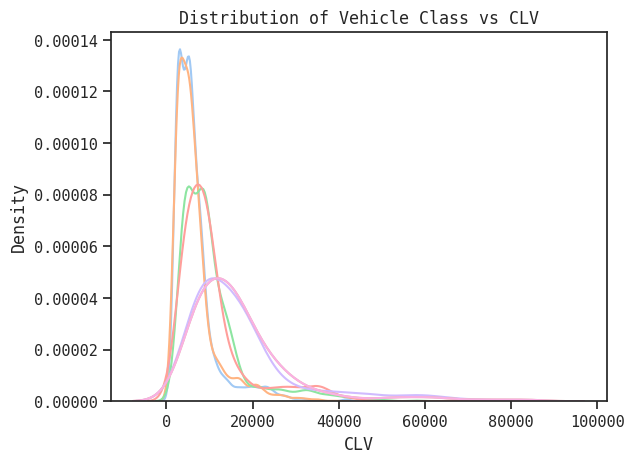

In [264]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)
sns.distplot(Ma, hist=False)
sns.distplot(Da, hist=False)
sns.distplot(Ca, hist=False)
sns.distplot(Ca, hist=False)

plt.title('Distribution of Vehicle Class vs CLV')
plt.show()

In [265]:
m = stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)
print(m)

KruskalResult(statistic=1310.5494960284416, pvalue=3.309676344717952e-281)


In [266]:
# p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV

In [267]:
#Vehicle Vehicle Size

In [268]:
Ba=auto_insurance_df_copy[auto_insurance_df_copy['Vehicle Size']=='Medsize']['CLV']
Co=auto_insurance_df_copy[auto_insurance_df_copy['Vehicle Size']=='Small']['CLV']
Hi=auto_insurance_df_copy[auto_insurance_df_copy['Vehicle Size']=='Large']['CLV']

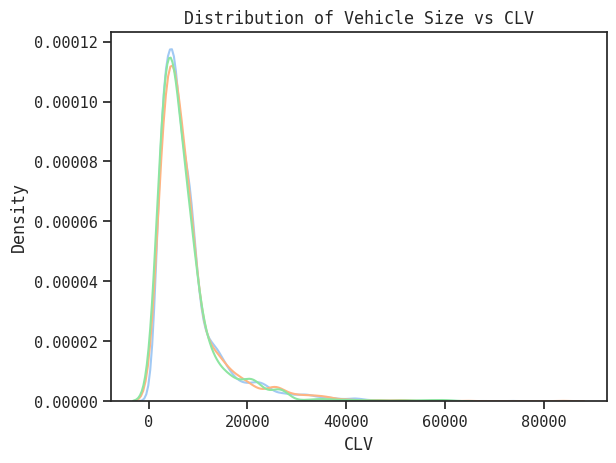

In [269]:
sns.distplot(Ba, hist=False)
sns.distplot(Co,hist=False)
sns.distplot(Hi, hist=False)


plt.title('Distribution of Vehicle Size vs CLV')
plt.show()

In [270]:
n =stats.kruskal(Ba,Co,Hi)
print(n)

KruskalResult(statistic=9.564995661218877, pvalue=0.00837505335446059)


In [271]:
#p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV

In [272]:
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1]]
p_values

[0.27998232358818953,
 0.8955985932127517,
 7.648852917746348e-110,
 0.015693004298603028,
 1.2758458797542519e-08,
 0.48749303056449833,
 0.29173464205664124,
 2.9009146434700455e-05,
 0.0998836452694168,
 0.4389248352544014,
 2.196144881912684e-36,
 0.2130272157209903,
 3.309676344717952e-281,
 0.00837505335446059,
 2.1564409504417123e-05,
 0.0]

In [273]:
cat_cols = [
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

pd.DataFrame(p_values,index=cat_cols,columns=['P_Value']).sort_values(by='P_Value', ascending=True)

P_Value
Number of Policies        0.0000000
Vehicle Class             0.0000000
Coverage                  0.0000000
Renew Offer Type          0.0000000
EmploymentStatus          0.0000000
Number of Open Complaints 0.0000216
Marital Status            0.0000290
Vehicle Size              0.0083751
Education                 0.0156930
Policy Type               0.0998836
Sales Channel             0.2130272
State                     0.2799823
Location Code             0.2917346
Policy                    0.4389248
Gender                    0.4874930
Response                  0.8955986

In [274]:
# Coverage,Education,EmploymentStatus,Marital Status, Renew Offer Type, Vehicle class, Vehicle class,
# Number of open complaints and No of Policies play a significant role in predicting the CLV

In [277]:
pd.DataFrame(p_values,index=cat_cols,columns=['P_Value']).sort_values(by='P_Value', ascending=True).reset_index().to_excel('Statistical_testing.xlsx', index=False)